In [1]:
#Import libraries

#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

#Import module to Standardize the data
from sklearn.preprocessing import StandardScaler

#Import module to compute metrics
from sklearn import metrics

# Import module to split dataset
from sklearn.model_selection import train_test_split

# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Import data analysis modules
import pandas as pd
import numpy as np

# Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import random

# Chargement des données de mobilité éligible

In [2]:
df_persons = pd.read_csv('input_hdf/person_hdf.csv',sep=";",encoding='utf8') 
df_households = pd.read_csv('input_hdf/menage_hdf.csv',sep=";",encoding='utf8')  
# Load Communes data for mapping
data_xy = pd.read_csv('input_hdf/communesXY.csv', sep=",",encoding='utf8')

In [73]:
per = pd.read_csv('input_hdf/person_hdf.csv',sep=";",encoding='utf8')  #men pour etudier le nmbre

In [77]:
per["COEQ"].sum()

3943972.94040876

In [3]:
df_persons

,PP1,PEMD,PANN,ECH,PECH,PP2,PTIR,PTLO,PER,P2,...,P24,P25,PENQ,PGRP,PNPC,COQA,COEQ,PFIN,Field37,PTDQ
0,2,1,2004,12004000118174,1200400011817402,62119,1,118,2,2,...,4.0,5.0,1,4,3.0,92.502000,89.421154,0,0,0
1,2,1,2004,12004000119131,1200400011913101,62119,1,119,1,2,...,4.0,5.0,1,10,2.0,38.997000,36.892154,0,0,0
2,2,1,2004,12004000119131,1200400011913102,62119,1,119,2,1,...,4.0,5.0,1,4,2.0,38.997000,44.193725,0,10,1
3,2,1,2004,12004000119185,1200400011918501,62119,1,119,1,2,...,2.0,4.0,1,11,1.0,56.129000,73.569566,0,0,0
4,2,1,2004,12004000120149,1200400012014901,62119,1,120,1,2,...,5.0,5.0,1,11,1.0,56.129000,70.795973,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76746,2,30,2014,3020144560092582,302014456009258202,80021,46,456009,2,2,...,1.0,4.0,1,10,2.0,7.108026,7.108026,0,22,1
76747,2,30,2014,3020144560092921,302014456009292102,80021,46,456009,2,2,...,5.0,5.0,1,5,2.0,7.498114,7.498114,0,22,1
76748,2,30,2014,3020144560093087,302014456009308701,80021,46,456009,1,2,...,1.0,1.0,1,6,1.0,8.938802,8.938802,0,22,1
76749,2,30,2014,3020144560093629,302014456009362901,80021,46,456009,1,2,...,2.0,4.0,1,9,2.0,7.498114,7.498114,0,22,1


# Résidence des grands mobiles des HdF

In [4]:
def mapping_codeINSEE_codeDep(data, data_xy):
    #select columns
    data_xy.columns =["ID_GEOFLA","INSEE_COM","INSEE_CODE","NOM_COMM","STATUT","X_CHF_LIEU","Y_CHF_LIEU","X_CENTROID",
                         "Y_CENTROID","Z_MOYEN","SUPERFICIE","POPULATION","CODE_CANT","CODE_ARR","CODE_DEPT","NOM_DEPT",
                         "CODE_REG","NOM_REGION","NUM_D30","NOM_D30","Xcord","Ycord"]
    
    # mapping code INSEE avec code departement, région et numero commune
    map_reg = dict(zip(data_xy.INSEE_CODE, data_xy.CODE_REG))
    map_dept = dict(zip(data_xy.INSEE_CODE, data_xy.CODE_DEPT))
    map_com = dict(zip(data_xy.INSEE_CODE, data_xy.NUM_D30))   
    
    # Créer des colonnes codes DEPT, REG et Commune de résidence
    data["CODE_REG_PP2"]=data["PP2"]
    data["CODE_DEPT_PP2"]=data["PP2"]
    data["CODE_COM_PP2"]=data["PP2"]
    
    # Remplacer les codes INSEE par le code département
    data[["CODE_REG_PP2"]] = data[["CODE_REG_PP2"]].applymap(map_reg.get)
    data[["CODE_DEPT_PP2"]] = data[["CODE_DEPT_PP2"]].applymap(map_dept.get)
    data[["CODE_COM_PP2"]] = data[["CODE_COM_PP2"]].applymap(map_com.get)
    
    data = data.dropna(subset=["CODE_REG_PP2","CODE_DEPT_PP2","CODE_COM_PP2"])
    
    return data

In [5]:
def mapping_codeINSEE_household_codeDep(data, data_xy):
    #select columns
    data_xy.columns =["ID_GEOFLA","INSEE_COM","INSEE_CODE","NOM_COMM","STATUT","X_CHF_LIEU","Y_CHF_LIEU","X_CENTROID",
                         "Y_CENTROID","Z_MOYEN","SUPERFICIE","POPULATION","CODE_CANT","CODE_ARR","CODE_DEPT","NOM_DEPT",
                         "CODE_REG","NOM_REGION","NUM_D30","NOM_D30","Xcord","Ycord"]
    
    # mapping code INSEE avec code departement, région et numero commune
    map_reg = dict(zip(data_xy.INSEE_CODE, data_xy.CODE_REG))
    map_dept = dict(zip(data_xy.INSEE_CODE, data_xy.CODE_DEPT))
    map_com = dict(zip(data_xy.INSEE_CODE, data_xy.NUM_D30))   
    
    # Créer des colonnes codes DEPT, REG et Commune de résidence
    data["CODE_REG_MP2"]=data["MP2"]
    data["CODE_DEPT_MP2"]=data["MP2"]
    data["CODE_COM_MP2"]=data["MP2"]
    
    # Remplacer les codes INSEE par le code département
    data[["CODE_REG_MP2"]] = data[["CODE_REG_MP2"]].applymap(map_reg.get)
    data[["CODE_DEPT_MP2"]] = data[["CODE_DEPT_MP2"]].applymap(map_dept.get)
    data[["CODE_COM_MP2"]] = data[["CODE_COM_MP2"]].applymap(map_com.get)
    
    data = data.dropna(subset=["CODE_REG_MP2","CODE_DEPT_MP2","CODE_COM_MP2"])
    
    return data

In [6]:
# Application de la fonction de transformation (person_dep ne prend que les personnes des HdF:figurant dans CommunesXY.csv)
df_persons1 = mapping_codeINSEE_codeDep(df_persons, data_xy)
df_households1 = mapping_codeINSEE_household_codeDep(df_households, data_xy)

# Redressement des données

In [7]:
random=np.random.RandomState(1234)

In [8]:
###Redressements des personnes à partir des poids des personnes
# Perform stochastic rounding for the population (and scale weights)
df_rounding = df_persons[["PECH", "COEQ"]].drop_duplicates("PECH")
df_rounding["multiplicator"] = np.floor(df_rounding["COEQ"])##Recuperation des parties entières
df_rounding["multiplicator"] += random.random_sample(len(df_rounding)) <= (df_rounding["COEQ"] - df_rounding["PECH"])###Arrondissement
df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)

person_multiplicators = df_rounding["multiplicator"].values
df_persons = df_persons.iloc[np.repeat(np.arange(len(df_persons)), person_multiplicators)]##Dupliquer les lignes autant de fois qu'il y a poids de personnes pour la ligne

# Create new person IDs
df_persons["red_person_id"] = df_persons["PECH"]
df_persons["PECH"] = np.arange(len(df_persons))

del df_persons["COEQ"]

<ipython-input-8-40ac144bdfc0>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)
<ipython-input-8-40ac144bdfc0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persons["red_person_id"] = df_persons["PECH"]
<ipython-input-8-40ac14

In [9]:
###Redressements des menages à partir des poids des households
# Perform stochastic rounding for the households (and scale weights)
df_rounding_men = df_households[["ECH", "COEM"]].drop_duplicates("ECH")
df_rounding_men["multiplicator"] = np.floor(df_rounding_men["COEM"])##Recuperation des parties entières
df_rounding_men["multiplicator"] += random.random_sample(len(df_rounding_men)) <= (df_rounding_men["COEM"] - df_rounding_men["ECH"])###Arrondissement
df_rounding_men["multiplicator"] = df_rounding_men["multiplicator"].astype(np.int)

household_multiplicators = df_rounding_men["multiplicator"].values
df_households = df_households.iloc[np.repeat(np.arange(len(df_households)), household_multiplicators)]##Dupliquer les lignes autant de fois qu'il y a poids de householdnes pour la ligne

# Create new household IDs
df_households["red_household_id"] = df_households["ECH"]
df_households["ECH"] = np.arange(len(df_households))

del df_households["COEM"]

<ipython-input-9-62908dca4695>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_rounding_men["multiplicator"] = df_rounding_men["multiplicator"].astype(np.int)


In [10]:
df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 59.0] = "Nord"
df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 62.0] = "Pas-de-Calais"
df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 80.0] = "Somme"
df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 60.0] = "Oise"
df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 2.0] = "Aisne"
df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 76.0] = "Somme" # Seine Maritime

<ipython-input-10-727132d1b15d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persons["CODE_DEPT_PP2"][df_persons["CODE_DEPT_PP2"] == 59.0] = "Nord"
/home/ndiop/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-10-727132d1b15d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persons["CODE_DEPT_PP2"][df_persons["C

In [11]:
df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 59.0] = "Nord"
df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 62.0] = "Pas-de-Calais"
df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 80.0] = "Somme"
df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 60.0] = "Oise"
df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 2.0] = "Aisne"
df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 76.0] = "Somme" # Seine Maritime

<ipython-input-11-f1ac9607a4f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_households["CODE_DEPT_MP2"][df_households["CODE_DEPT_MP2"] == 59.0] = "Nord"


In [69]:
df_households["NP"].sum()

5821858

In [12]:
##Reduction of barplot width
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [13]:
ncount = len(df_persons)

print('Nombre total de Mobiles : ' , ncount)

print('Département de résidence :')
print('---------------------')
print('59 -- Nord')
print('62 -- Pas-de-Calais')
print('02 -- Aisne')
print('60 -- Oise')
print('80 -- Somme')
print('76 -- Seine Maritime')

Nombre total de Mobiles :  3905404
Département de résidence :
---------------------
59 -- Nord
62 -- Pas-de-Calais
02 -- Aisne
60 -- Oise
80 -- Somme
76 -- Seine Maritime


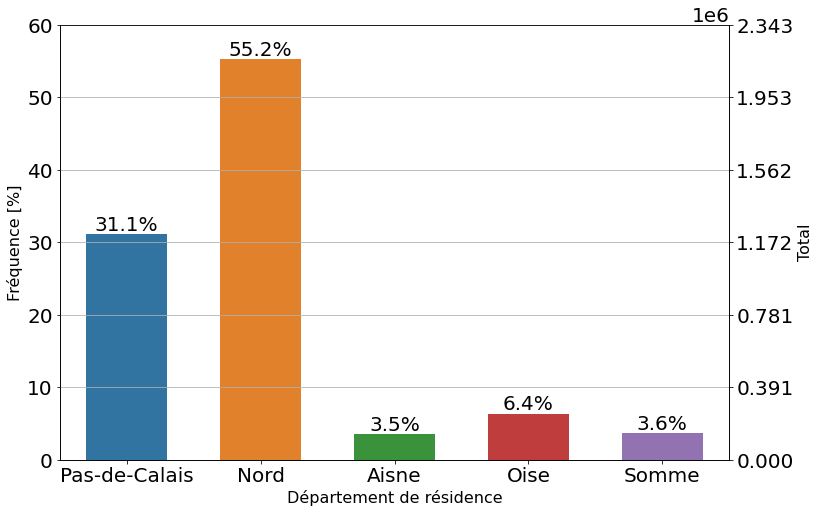

In [54]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='CODE_DEPT_PP2', data=df_persons)

#plt.title('Distribution des mobiles dans les départements Hauts De France de 2016')
plt.xlabel('Département de résidence', fontsize=16)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total', fontsize=16)
ax2.set_ylabel('Fréquence [%]', fontsize=16)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]

    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),ha='center',va='bottom', fontsize=20) # font etiquette
    #ax.annotate(y, (x.mean(), y),ha='center', va='bottom')
    # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/60))
ax.set_ylim(0,ncount/(100/60))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .6)

plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/MobileDeptHdF2.pdf')

# Véhcules à disposition pour les ménages

In [14]:
NUMBER_OF_VEHICLES_BOUNDS = [0, 1, 2, np.inf]
NUMBER_OF_VEHICLES_LABELS = ["0", "1", "2", "3+"]
df_households["number_of_vehicles_class"] = np.digitize(df_households["M5"], NUMBER_OF_VEHICLES_BOUNDS, right = True)

In [15]:
df_households.loc[df_households["number_of_vehicles_class"] == 0, "number_of_vehicles_class"] = "0"
df_households.loc[df_households["number_of_vehicles_class"] == 1, "number_of_vehicles_class"] = "1"
df_households.loc[df_households["number_of_vehicles_class"] == 2, "number_of_vehicles_class"] = "2"
df_households.loc[df_households["number_of_vehicles_class"] == 3, "number_of_vehicles_class"] = "3+"

In [16]:
l=df_households[df_households["M5"].isna()==False]
ncount = len(l)

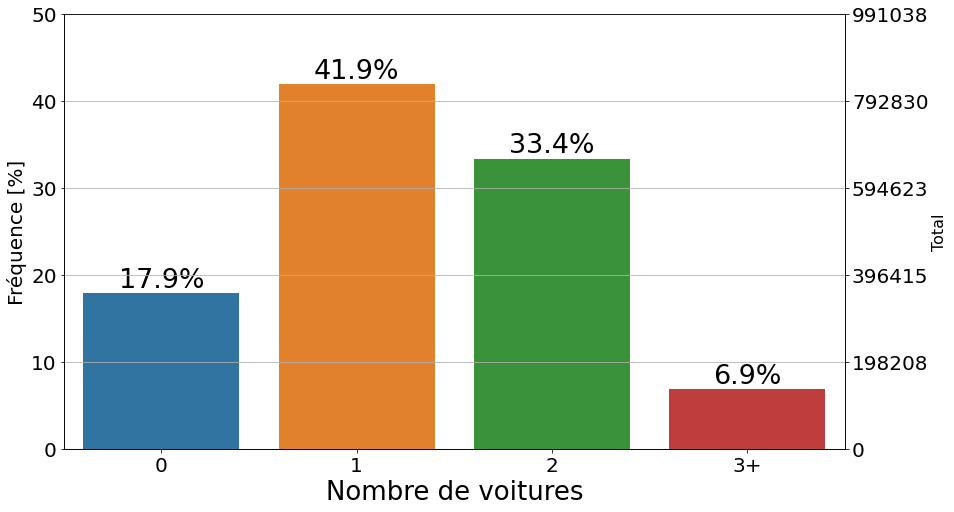

In [40]:
plt.rcParams['font.size'] = 20 # resize label axe

plt.figure(figsize=(14,8))
ax=sns.countplot(x='number_of_vehicles_class', data=df_households, order=NUMBER_OF_VEHICLES_LABELS)

#plt.title('Véhicule à disposition des ménages des Grands Mobiles')
plt.xlabel('Nombre de voitures', fontsize=26)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total', fontsize=16)
ax2.set_ylabel('Fréquence [%]', fontsize=20)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom', fontsize=27) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(6))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2)
ax.set_ylim(0,ncount/2)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#change_width(ax, .6)
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/household-car-ownership-classfull.pdf')

In [41]:
no=l[l["CODE_DEPT_MP2"]=="Nord"]
ca=l[l["CODE_DEPT_MP2"]=="Pas-de-Calais"]
oi=l[l["CODE_DEPT_MP2"]=="Oise"]
ai=l[l["CODE_DEPT_MP2"]=="Aisne"]
so=l[l["CODE_DEPT_MP2"]=="Somme"]

no_voit0 = no[no["number_of_vehicles_class"]=='0']
no_voit1 = no[no["number_of_vehicles_class"]=='1']
no_voit2 = no[no["number_of_vehicles_class"]=='2']
no_voit3 = no[no["number_of_vehicles_class"]=='3+']

ca_voit0 = ca[ca["number_of_vehicles_class"]=='0']
ca_voit1 = ca[ca["number_of_vehicles_class"]=='1']
ca_voit2 = ca[ca["number_of_vehicles_class"]=='2']
ca_voit3 = ca[ca["number_of_vehicles_class"]=='3+']

oi_voit0 = oi[oi["number_of_vehicles_class"]=='0']
oi_voit1 = oi[oi["number_of_vehicles_class"]=='1']
oi_voit2 = oi[oi["number_of_vehicles_class"]=='2']
oi_voit3 = oi[oi["number_of_vehicles_class"]=='3+']

ai_voit0 = ai[ai["number_of_vehicles_class"]=='0']
ai_voit1 = ai[ai["number_of_vehicles_class"]=='1']
ai_voit2 = ai[ai["number_of_vehicles_class"]=='2']
ai_voit3 = ai[ai["number_of_vehicles_class"]=='3+']

so_voit0 = so[so["number_of_vehicles_class"]=='0']
so_voit1 = so[so["number_of_vehicles_class"]=='1']
so_voit2 = so[so["number_of_vehicles_class"]=='2']
so_voit3 = so[so["number_of_vehicles_class"]=='3+']

In [42]:
df1 = pd.DataFrame(columns=['0','1','2','3+'])
lst = ["Nord","Pas-de-Calais","Oise","Aisne","Somme"]
df0 = pd.DataFrame(lst, columns = ['departement'])

In [43]:
# nord
df_new_row = pd.DataFrame(data=np.array([[100*len(no_voit0)/len(no),100*len(no_voit1)/len(no),
                                          100*len(no_voit2)/len(no),100*len(no_voit3)/len(no)]]), 
                                          columns=['0','1','2','3+'])
df1 = pd.concat([df1,df_new_row], ignore_index=True)

# pas-de-calais
df_new_row = pd.DataFrame(data=np.array([[100*len(ca_voit0)/len(ca),100*len(ca_voit1)/len(ca),
                                          100*len(ca_voit2)/len(ca),100*len(ca_voit3)/len(ca)]]), 
                                          columns=['0','1','2','3+'])
df1 = pd.concat([df1,df_new_row], ignore_index=True)

# oise
df_new_row = pd.DataFrame(data=np.array([[100*len(oi_voit0)/len(oi),100*len(oi_voit1)/len(oi),
                                          100*len(oi_voit2)/len(oi),100*len(oi_voit3)/len(oi)]]), 
                                          columns=['0','1','2','3+'])
df1 = pd.concat([df1,df_new_row], ignore_index=True)

# aisne
df_new_row = pd.DataFrame(data=np.array([[100*len(ai_voit0)/len(ai),100*len(ai_voit1)/len(ai),
                                          100*len(ai_voit2)/len(ai),100*len(ai_voit3)/len(ai)]]), 
                                          columns=['0','1','2','3+'])
df1 = pd.concat([df1,df_new_row], ignore_index=True)

# somme
df_new_row = pd.DataFrame(data=np.array([[100*len(so_voit0)/len(so),100*len(so_voit1)/len(so),
                                          100*len(so_voit2)/len(so),100*len(so_voit3)/len(so)]]), 
                                          columns=['0','1','2','3+'])
df1 = pd.concat([df1,df_new_row], ignore_index=True)

In [44]:
df2 = pd.concat([df0.copy(),df1.copy()], axis=1, ignore_index=False)
df3=df2.copy().transpose()
df3

,0,1,2,3,4
departement,Nord,Pas-de-Calais,Oise,Aisne,Somme
0,22.074641,18.194426,3.263091,3.857549,2.655815
1,43.112913,44.08896,33.660759,35.080851,33.174084
2,29.436711,31.514259,50.165165,48.009947,50.588262
3+,5.375736,6.202355,12.910985,13.051652,13.581839


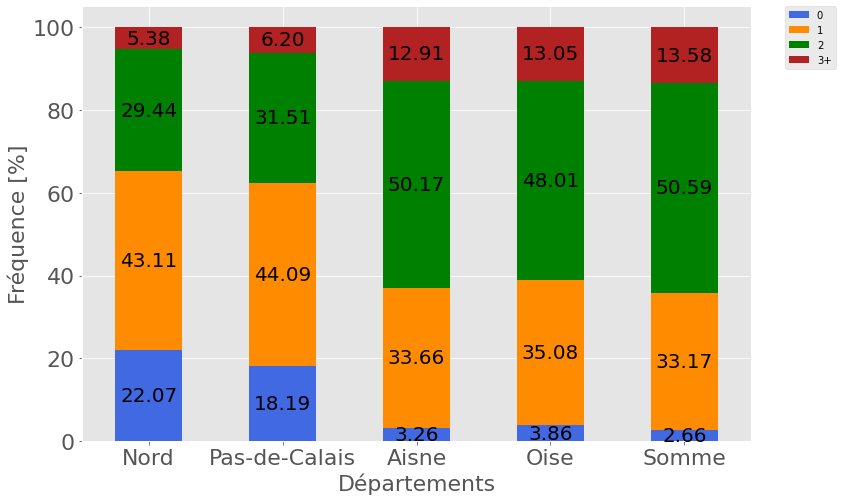

In [61]:
dep=["Nord","Pas-de-Calais","Aisne","Oise","Somme"]
data={
    "0":[22.074641,18.194426,3.263091,3.857549,2.655815],
    "1":[43.112913,44.08896,33.660759,35.080851,33.174084],
    "2":[29.436711,31.514259,50.165165,48.009947,50.588262],
    "3+":[5.375736,6.202355,12.910985,13.051652,13.581839],
    }
df=pd.DataFrame(data,index=dep)

plt.style.use('ggplot')
Couleur=['royalblue', 'darkorange', 'g', 'firebrick']
ax = df.plot(stacked=True, kind='bar', figsize=(12, 8),color=Couleur, rot='horizontal', fontsize=22)


# mettre les informations sur chaque barre
for rect in ax.patches:
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # remplir les valeurs à l'interieur des barres
    label_text = f'{h:.2f}'  
    
    # ax.text(x, y, text)
    label_x = x + w / 2
    label_y = y + h / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Fréquence [%]", fontsize=22)
ax.set_xlabel("Départements", fontsize=22)
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/dep-household-car-ownership-class2.pdf')

# Taille des ménages

In [62]:
df_household_recovery=df_households
HOUSEHOLD_SIZE_BOUNDS = [1, 2]
HOUSEHOLD_SIZE_LABELS = ["1", "2", "3+"]
df_household_recovery["household_size_class"] = np.digitize(df_household_recovery["NP"], HOUSEHOLD_SIZE_BOUNDS, 
                                                            right = True)

df_household_recovery.loc[df_household_recovery["household_size_class"] == 0, "household_size_class"] = "1"
df_household_recovery.loc[df_household_recovery["household_size_class"] == 1, "household_size_class"] = "2"
df_household_recovery.loc[df_household_recovery["household_size_class"] == 2, "household_size_class"] = "3+"

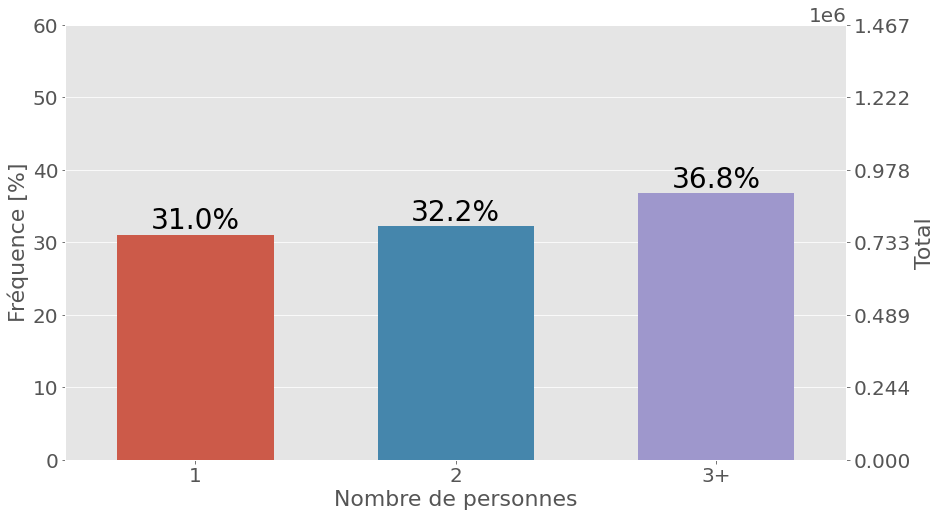

In [66]:
ncount = len(df_household_recovery)
plt.rcParams['font.size'] = 20 # resize label axe
plt.figure(figsize=(14,8))
ax=sns.countplot(x='household_size_class', data=df_household_recovery, order=HOUSEHOLD_SIZE_LABELS)

#plt.title('Catégorie de la taille du ménage')
plt.xlabel('Nombre de personnes', fontsize=22)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total', fontsize=22)
ax2.set_ylabel('Fréquence [%]', fontsize=22)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom', fontsize=28) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/60))
ax.set_ylim(0,ncount/(100/60))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .6)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/householdSize-classfull2.pdf')

In [67]:
df_household_npdc=df_household_recovery[(df_household_recovery["CODE_DEPT_MP2"]=="Nord") | (df_household_recovery["CODE_DEPT_MP2"]=="Pas-de-Calais")]

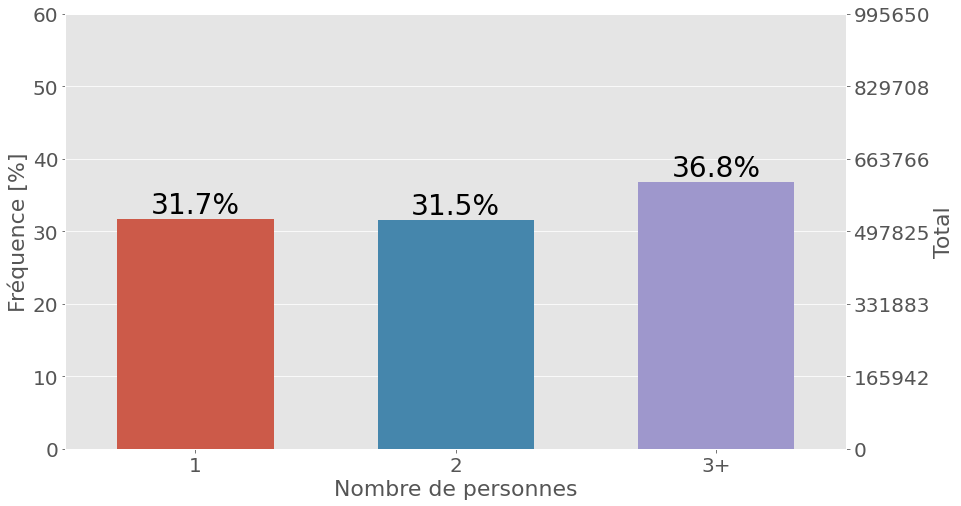

In [68]:

ncount = len(df_household_npdc)

plt.rcParams['font.size'] = 20 # resize label axe
plt.figure(figsize=(14,8))
ax=sns.countplot(x='household_size_class', data=df_household_npdc, order=HOUSEHOLD_SIZE_LABELS)

#plt.title('Catégorie de la taille du ménage')
plt.xlabel('Nombre de personnes', fontsize=22)

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total', fontsize=22)
ax2.set_ylabel('Fréquence [%]', fontsize=22)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom', fontsize=28) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/60))
ax.set_ylim(0,ncount/(100/60))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .6)

plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/householdSize-classfull-npdc.pdf')

# Les personnes

In [80]:
df_persons = df_persons.rename(columns={"P4":"AGE","P2":"SEXE","P9":"CSP"})

In [81]:
AGE_SIZE_BOUNDS = [17, 24, 34, 49, 64]
AGE_SIZE_LABELS = ["11-17", "18-24", "25-34", "35-49", "50-64", "65+"]
df_persons["AGE_size_class"] = np.digitize(df_persons["AGE"], AGE_SIZE_BOUNDS, right = True)



df_persons.loc[df_persons["AGE_size_class"] == 0, "AGE_size_class"] = AGE_SIZE_LABELS[0]
df_persons.loc[df_persons["AGE_size_class"] == 1, "AGE_size_class"] = AGE_SIZE_LABELS[1]
df_persons.loc[df_persons["AGE_size_class"] == 2, "AGE_size_class"] = AGE_SIZE_LABELS[2]
df_persons.loc[df_persons["AGE_size_class"] == 3, "AGE_size_class"] = AGE_SIZE_LABELS[3]
df_persons.loc[df_persons["AGE_size_class"] == 4, "AGE_size_class"] = AGE_SIZE_LABELS[4]
df_persons.loc[df_persons["AGE_size_class"] == 5, "AGE_size_class"] = AGE_SIZE_LABELS[5]

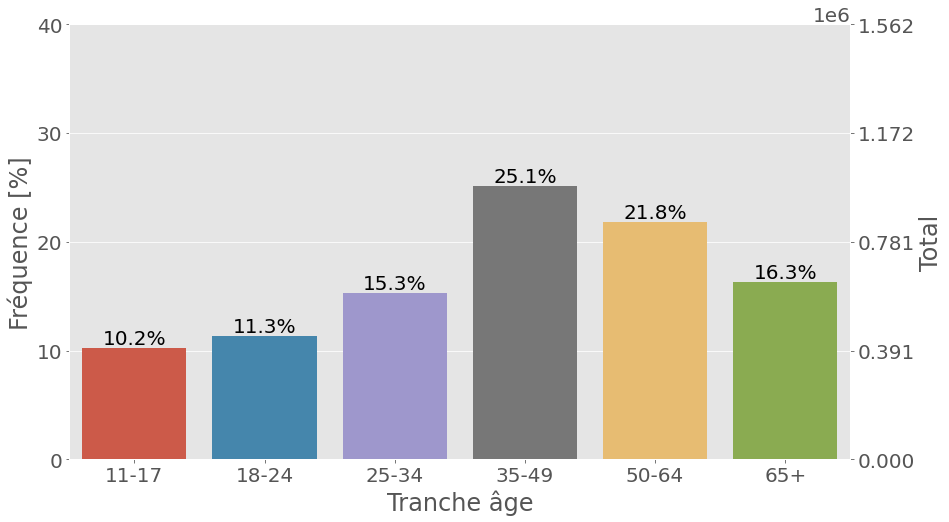

In [86]:
ncount = len(df_persons)

plt.rcParams['font.size'] = 20 # resize label axe
plt.figure(figsize=(14,8))
ax=sns.countplot(x='AGE_size_class', data=df_persons, order=AGE_SIZE_LABELS)

#plt.title('Catégorie age')
plt.xlabel('Tranche âge')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/2.5)
ax.set_ylim(0,ncount/2.5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#change_width(ax, .2)
#plt.show()
#ax.set(facecolor = "white")
#plt.grid(which='major', axis='x', color='g', linewidth=2)
#plt.grid(which='major', axis='y', color='b', linestyle='dashed')
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/ageSize-classfull2.pdf')

In [87]:
df_persons["SEXE"][df_persons["SEXE"] == 1] = "Homme"
df_persons["SEXE"][df_persons["SEXE"] == 2] = "Femme"

<ipython-input-87-f4317111541a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persons["SEXE"][df_persons["SEXE"] == 1] = "Homme"


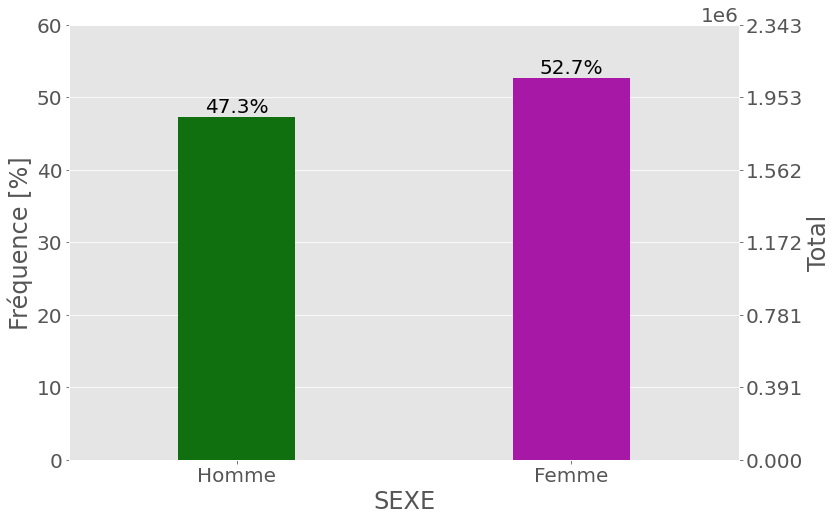

In [90]:
ncount = len(df_persons)

plt.figure(figsize=(12,8))
ax=sns.countplot(x='SEXE', data=df_persons, order=["Homme","Femme"], palette={"Homme": "g", "Femme": "m"})


#plt.title('Part des sexes')
plt.xlabel('SEXE')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/60))
ax.set_ylim(0,ncount/(100/60))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .35)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/personSexfull.pdf')

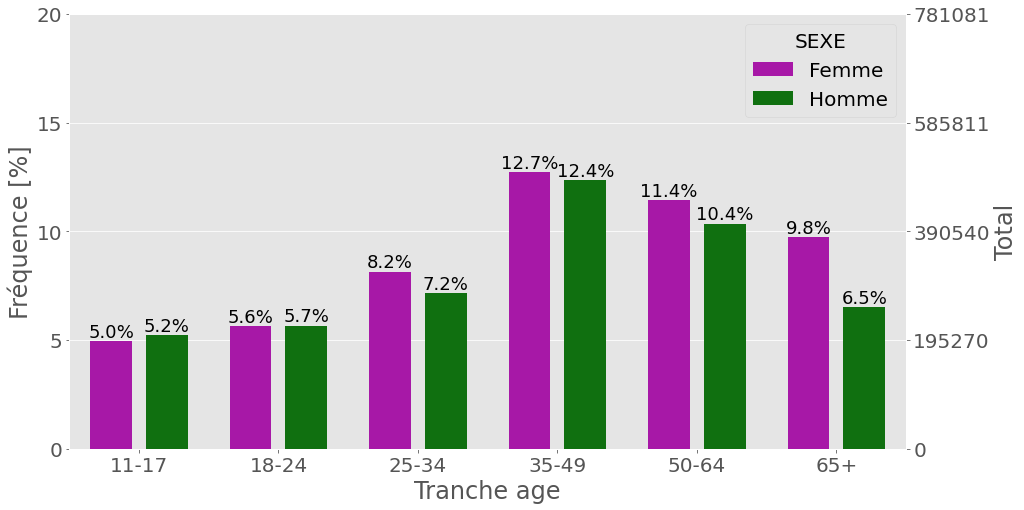

In [93]:
ncount = len(df_persons)

plt.figure(figsize=(15,8))
ax=sns.countplot(x='AGE_size_class', hue='SEXE', data=df_persons, order=AGE_SIZE_LABELS, palette={"Homme": "g", "Femme": "m"})

#plt.title('Population par âge et sexe')
plt.xlabel('Tranche age')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom',fontsize=18) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/5)
ax.set_ylim(0,ncount/5)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

#plt.show()

plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/personSexAgefull.pdf')

# Catégorie socioprofessionnelle

In [ ]:
# Occupation principale : P7
##1: temps plein,   2: temps partiel et 3: apprentit,
# stage, formation, 4: étudiant, 5: scolaire jusqu'au bac, 6: chomeur, 7: retraité, 8:reste au foyer, 9: autre

In [101]:
df_persons_recovery=df_persons
df_persons["professional_occupation"] = df_persons["P7"]

In [103]:
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 1, "professional_occupation"] = "Temps plein"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 2, "professional_occupation"] = "Temps partiel"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 3, "professional_occupation"] = "Stage"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 4, "professional_occupation"] = "Etudiant"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 5, "professional_occupation"] = "Eleve"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 6, "professional_occupation"] = "Chômeur"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 7, "professional_occupation"] = "Retraité"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 8, "professional_occupation"] = "Au foyer"
df_persons_recovery.loc[df_persons_recovery["professional_occupation"] == 9, "professional_occupation"] = "Autre"

In [114]:
df_persons_recovery2=df_persons_recovery[df_persons_recovery["professional_occupation"].isna()==False]

In [136]:
# to order items for ploting
CSP_class = ["Temps plein", "Temps partiel", "Stage", "Etudiant", "Eleve", "Chômeur", "Retraité", "Au foyer", "Autre"]

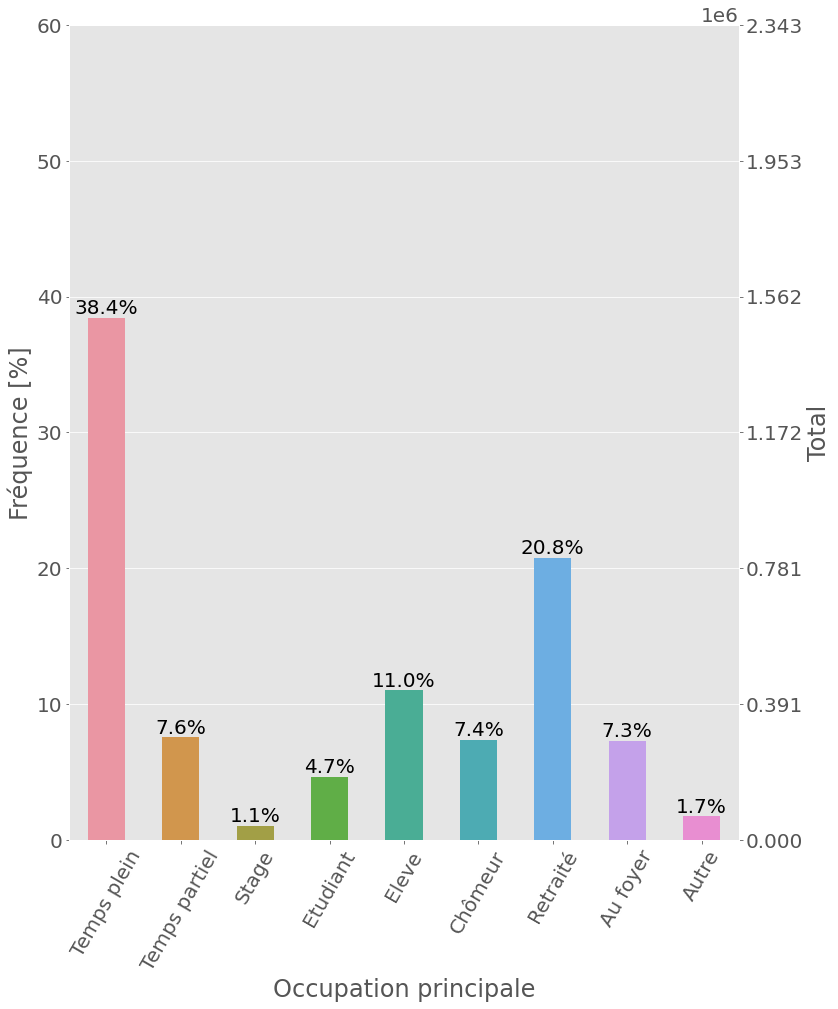

In [138]:
ncount = len(df_persons_recovery2)

plt.figure(figsize=(12,15))
ax=sns.countplot(x='professional_occupation', data=df_persons_recovery2, order=CSP_class)

#plt.title('Distribution of the population by professionnal occupation')
plt.xlabel('Occupation principale')
plt.xticks(rotation=60) # rotation label
# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(7))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/60))
ax.set_ylim(0,ncount/(100/60))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .5)
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/ocupationfull.pdf')

In [148]:
sex=["Homme","Femme"]

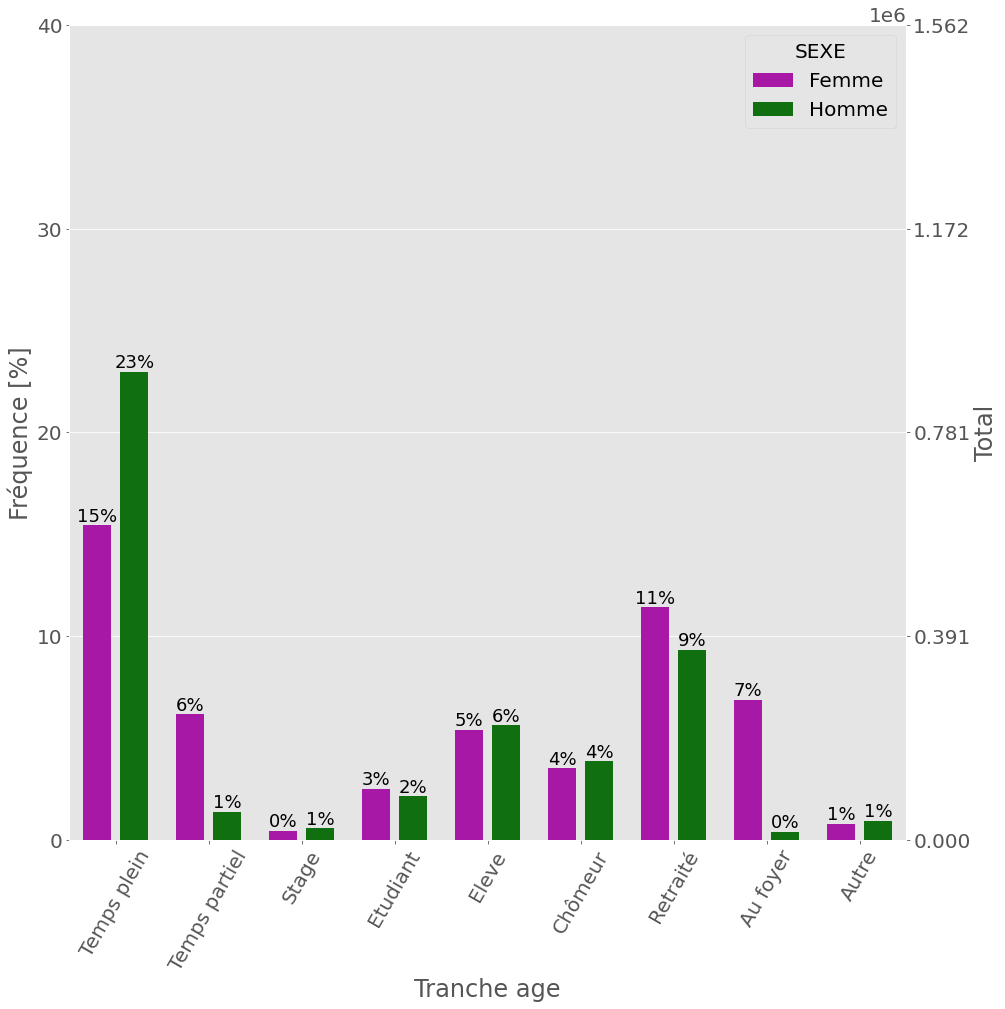

In [156]:
ncount = len(df_persons_recovery2)

plt.figure(figsize=(15,15))
ax=sns.countplot(x='professional_occupation', hue='SEXE', data=df_persons_recovery2, order=CSP_class, palette={"Homme": "g", "Femme": "m"})

#plt.title('Population par âge et sexe')
plt.xlabel('Tranche age')
plt.xticks(rotation=60) # rotation label

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom',fontsize=18) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(5))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/40))
ax.set_ylim(0,ncount/(100/40))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .3)

#plt.show()

plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/ocupationAgefull.pdf')

In [157]:
trip=pd.read_csv("/home/ndiop/Documents/phd/scripts/analyse/travelDiaryDeciles_npdc.csv", ";",encoding='utf8')

/home/ndiop/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# MEL Trips

In [12]:
# Matrice OD entre dept et entre D30 avec le code matriceOD des communes. Matcher ce trip avec les dataXY

Index(['DECH', 'PECH', 'COEQ', 'DP2', 'D4A', 'D4B', 'D3', 'D3X', 'D3Y', 'D2AA',
       'D8A', 'D8B', 'D7', 'D7X', 'D7Y', 'D5AA', 'MODP', 'NDEP', 'SUP_D3',
       'SUP_D7', 'CODEDEPT_D3', 'CODEREG_D3', 'CODEDEPT_D7', 'CODEREG_D7',
       'MTDQ', 'PTDQ', 'P4', 'P2', 'P5', 'P10', 'M5', 'DOIB', 'DIST', 'D8C',
       'D9', 'M6A', 'M6B', 'M6C', 'M6D', 'CODEDEPT_PP2', 'CODEREG_PP2',
       'CODEDEPT_DP2', 'CODEREG_DP2', 'Q115', 'Q215', 'Q315', 'Q3_Q1', 'D115',
       'D215', 'D315', 'D415', 'D615', 'D715', 'D815', 'D915', 'ECH_x'],
      dtype='object')

In [ ]:
# Extraction des déplacements de la zone Lille-MEL-Tourcoing : 012,013 et 014

In [158]:
XY=pd.read_csv("/home/ndiop/Documents/phd/scripts/demandgeneration2/input_hdf/communesXY.csv", ",",encoding='utf8', dtype=str)

In [159]:
T=trip.copy()

In [160]:
'''Cette fonction permet de remplacer les codes INSEE par les coordonnées (X et Y) et le sauvegarder dans un fichier.
    Elle renvoie en sortie les nouvelle données avec les coordonnées X et Y
    Elle prend comme entrées: data, data_xy et output_file
        data est les données avec les code postaux que nous donnent la fonction mapping_codeINSEE_to_CodePostal,
        data_xy les données de correspondance code postal et (X, Y),
        output_file est le chemin complet du fichier de sortie
'''

# Remplacement des codes INSEE par leur correspondance X,Y
def mapping_codeINSEE_xy(data, data_xy):
    #select columns
    data_xy.columns =["ID_GEOFLA","CODE_COMM","INSEE_COM","NOM_COMM","STATUT","X_CHF_LIEU","Y_CHF_LIEU","X_CENTROID",
                         "Y_CENTROID","Z_MOYEN","SUPERFICIE","POPULATION","CODE_CANT","CODE_ARR","CODE_DEPT","NOM_DEPT",
                         "CODE_REG","NOM_REGION","NUM_D30","NOM_D30","Xcord","Ycord"]
    
    #mapping code INSEE et NumD30
    map_dept = dict(zip(data_xy.INSEE_COM, data_xy.NUM_D30))
    
    # Créer des colonnes pour Superficie et CODE_DEPT
    data["NUM_D30_D3"]=data["D3"]
    data["NUM_D30_D7"]=data["D7"]
    
    #Remplacer les codes INSEE par les correspondants
    data[["NUM_D30_D3"]] = data[["NUM_D30_D3"]].applymap(map_dept.get)
    data[["NUM_D30_D7"]] = data[["NUM_D30_D7"]].applymap(map_dept.get)
    
    data = data.dropna(subset=["NUM_D30_D3","NUM_D30_D7"])
    
    #data[cols].to_csv(output_file,index=None, sep=";")
    
    return data

# Application de la fonction de transformation en XY
trip2 = mapping_codeINSEE_xy(T, XY)

In [27]:
# T used to capt all trafics
## Déplacements pour la métropole de Lille en tant qu'origine ou destination de flux de la région 
is_depl = (T["NUM_D30_D3"] == '012') | (T["NUM_D30_D7"]=='012') | (T["NUM_D30_D3"] == '013') | (T["NUM_D30_D7"]=='013') | (T["NUM_D30_D3"] == '014') | (T["NUM_D30_D7"]=='014')

T1 = T[is_depl]

T1.to_csv("output_hdf/travelDiaries/travelDiary_mel.txt", index=None, sep=";")

In [30]:
T1

,DECH,PECH,COEQ,DP2,D4A,D4B,D3,D3X,D3Y,D2AA,...,D215,D315,D415,D615,D715,D815,D915,ECH_x,NUM_D30_D3,NUM_D30_D7
34,0120040001010600201,01200400010106002,49.5802118,62119,07,30,62119,674661.80202,7048040.28762,01,...,10837,12729.62962962963,14623,19225.416666666668,21900.666666666668,25877.33333333333,33081.333333333336,012004000101060,024,012
35,0120040001010600202,01200400010106002,49.5802118,62119,17,45,59350,703330.96289,7059422.55269,02,...,10837,12729.62962962963,14623,19225.416666666668,21900.666666666668,25877.33333333333,33081.333333333336,012004000101060,012,024
206,0120040001022050203,01200400010220502,47.7427991,62119,18,00,62119,674661.80202,7048040.28762,01,...,10837,12729.62962962963,14623,19225.416666666668,21900.666666666668,25877.33333333333,33081.333333333336,012004000102205,024,012
213,0120040001040820101,01200400010408201,97.7337240,62119,07,30,62119,674661.80202,7048040.28762,01,...,10837,12729.62962962963,14623,19225.416666666668,21900.666666666668,25877.33333333333,33081.333333333336,012004000104082,024,012
214,0120040001040820102,01200400010408201,97.7337240,62119,18,20,59350,703330.96289,7059422.55269,02,...,10837,12729.62962962963,14623,19225.416666666668,21900.666666666668,25877.33333333333,33081.333333333336,012004000104082,012,024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233357,30201445600319660102,302014456003196601,7.49081100,80021,18,00,59009,710832.17995,7059486.33075,02,...,11167.560975609756,13250.5,15356.8,20084,22956,27043.33333333333,34545,3020144560031966,012,032
233373,30201445600603430202,302014456006034302,8.91009700,80021,09,20,80021,649001.84505,6978182.20329,06,...,11167.560975609756,13250.5,15356.8,20084,22956,27043.33333333333,34545,3020144560060343,032,012
233374,30201445600603430203,302014456006034302,8.91009700,80021,15,00,59350,703330.96289,7059422.55269,07,...,11167.560975609756,13250.5,15356.8,20084,22956,27043.33333333333,34545,3020144560060343,012,012
233375,30201445600603430204,302014456006034302,8.91009700,80021,16,30,59350,703330.96289,7059422.55269,08,...,11167.560975609756,13250.5,15356.8,20084,22956,27043.33333333333,34545,3020144560060343,012,012


In [56]:
# T used to capt all trafics
## Déplacements pour le centre-ville de Lille en tant qu'origine ou destination de flux de la région 
is_deplL = (T1["NUM_D30_D3"] == 12.0) | (T1["NUM_D30_D7"]==12.0)

T2 = T1[is_deplL]

In [58]:
T2[T2["MODP"]==21.0]

,DECH,PECH,COEQ,DP2,D4A,D4B,D3,D3X,D3Y,D2AA,...,D215,D315,D415,D615,D715,D815,D915,ECH_x,NUM_D30_D3,NUM_D30_D7
0,120040001010600201,1200400010106002,49.580212,62119,7,30,62119,674661.80202,7.048040e+06,1,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000101060,24.0,12.0
1,120040001010600202,1200400010106002,49.580212,62119,17,45,59350,703330.96289,7.059423e+06,2,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000101060,12.0,24.0
2,120040001022050203,1200400010220502,47.742799,62119,18,0,62119,674661.80202,7.048040e+06,1,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000102205,24.0,12.0
3,120040001040820101,1200400010408201,97.733724,62119,7,30,62119,674661.80202,7.048040e+06,1,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000104082,24.0,12.0
4,120040001040820102,1200400010408201,97.733724,62119,18,20,59350,703330.96289,7.059423e+06,2,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000104082,12.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50386,30201445401013660103,302014454010136601,10.395450,80021,7,15,59350,703330.96289,7.059423e+06,2,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144540101366,12.0,32.0
50387,30201445500322800101,302014455003228001,13.510630,80021,8,0,59350,703330.96289,7.059423e+06,1,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144550032280,12.0,12.0
50388,30201445500322800102,302014455003228001,13.510630,80021,14,0,59350,703330.96289,7.059423e+06,2,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144550032280,12.0,7.0
50389,30201445600319660101,302014456003196601,7.490811,80021,6,45,80021,649001.84505,6.978182e+06,1,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144560031966,32.0,12.0


# Study trip NPDC

In [161]:
# trip intra france
tripNPDC=trip.copy()

In [162]:
df_trips0 = tripNPDC[["DECH","PECH","D2AA","D5AA","P2","P4","MODP","COEQ"]]

In [163]:
df_trips0=df_trips0.rename(columns={"P4":"AGE","P2":"SEXE","D2AA":"ORIGIN_PURPOSE",
                                    "D5AA":"DESTINATION_PURPOSE","MODP":"num_mode"})

In [164]:
# creation du fichier correspondance des modes de transport

def ModeTransport_NPDC(X):
   if((X ==11) | (X ==12) | (X ==13) | (X ==14) | (X ==15)):
       MODP = "bike"
   if((X ==21) | (X ==22) | (X ==61) | (X ==81) | (X ==93) | (X ==99)):
       MODP = "car"
   if((X ==31) | (X ==32) | (X ==33) | (X ==34) | (X ==35) | (X ==39) | 
      (X ==41) | (X ==43) | (X ==51) | (X ==71) | (X ==72) | (X ==91) | (X ==92) ):
       MODP = "pt"
   if(X ==1):
       MODP = "walk"
   return MODP

In [165]:
# Récupération de la liste des codes modes
liste = list(df_trips0["num_mode"].drop_duplicates(keep='first'))

In [15]:
# Fonction de correspondance entre les codes sur la liste et les modes définis
def CorrespondanceCreation(l):
    n=len(l)
    df = pd.DataFrame()
    df["num"] = ""
    df["modeC"] = ""
    for i in range(n):
        df.loc[i,"num"] = l[i]
        a = ModeTransport_NPDC(l[i])
        df.loc[i, "modeC"] = a               
    return df

In [217]:
dfCorr = CorrespondanceCreation(liste)

In [16]:
# Remplacement des codes pour les modes par leur correspondance
def mapping(data, target):
    target.columns =["num","modeC"]
    map_x = dict(zip(target.num, target.modeC))
    data["mode"]=data["num_mode"]
    data[["mode"]] = data[["mode"]].applymap(map_x.get)
    data = data.dropna(subset=["mode"])
    return data

In [219]:
df_trips = mapping(df_trips0.copy(), dfCorr)

In [220]:
df_trips.COEQ.sum()

13004352.219278231

# Trip frontalier

In [34]:
tripFRONT=pd.read_csv("/home/ndiop/Documents/phd/scripts/facilities/inputDataFrame/facilityok/tripFrBe.csv", ";",encoding='utf8')

/home/ndiop/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2,4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
tripFRONT

,Unnamed: 0,Unnamed: 0.1,id_person,IPONDI,COMMUNE,originX,originY,ARM,TRANS,DCFLT,...,statr_time,motifO,motifD,start_time,id_facilityO,X_facilityO,Y_facilityO,id_facilityD,X_facilityD,Y_facilityD
0,0,0,64464,4.962064,2031,785703.299030,6.970200e+06,ZZZZZ,4,BE56B,...,NaN,1,2,08:37:43,02031_h0,786589.299030,6.971036e+06,BE56B_2,787510.178713,6.990040e+06
1,1,0,64464,4.962064,2031,785703.299030,6.970200e+06,ZZZZZ,4,BE56B,...,NaN,2,1,17:01:21,BE56B_2,787510.178713,6.990040e+06,02031_h0,786589.299030,6.971036e+06
2,2,1,64465,4.962064,2031,785703.299030,6.970200e+06,ZZZZZ,4,BE932,...,NaN,1,2,08:30:21,02031_h1,786147.299030,6.970325e+06,BE932_3,806808.918284,6.994223e+06
3,3,1,64465,4.962064,2031,785703.299030,6.970200e+06,ZZZZZ,4,BE932,...,NaN,2,1,17:08:12,BE932_3,806808.918284,6.994223e+06,02031_h1,786147.299030,6.970325e+06
4,4,2,66166,5.131579,2079,780489.670370,6.969988e+06,ZZZZZ,4,BE520,...,NaN,1,2,08:29:02,02079_h2,781011.670370,6.970768e+06,BE520_1,802280.307596,7.036787e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26413,26413,13206,3684730_b,1.140069,BRUSSEL,797117.151905,7.061025e+06,ZZZZZ,4,BE214,...,NaN,2,1,18:32:25,59410_82,707775.817080,7.060737e+06,BE214_h4400,797535.151905,7.061247e+06
26414,26414,13207,3718593_b,3.133791,ESTAIMPUIS,721003.602829,7.065765e+06,ZZZZZ,4,BE574,...,NaN,1,2,08:04:37,BE574_h4401,721864.602829,7.066225e+06,59512_68,713123.358360,7.065740e+06
26415,26415,13207,3718593_b,3.133791,ESTAIMPUIS,721003.602829,7.065765e+06,ZZZZZ,4,BE574,...,NaN,2,1,16:14:15,59512_68,713123.358360,7.065740e+06,BE574_h4401,721864.602829,7.066225e+06
26416,26416,13208,3719709_b,4.543949,TOURNAI,729127.448595,7.061147e+06,ZZZZZ,4,BE570,...,NaN,1,2,08:29:11,BE570_h4402,729993.448595,7.061869e+06,59522_00,716411.415230,7.061087e+06


In [36]:
tripFRONT4 = tripFRONT[["Unnamed: 0","id_person","motifO","motifD","SEXE","AGEREVQ","TRANS","IPONDI"]]
tripFRONT4 = tripFRONT4.rename(columns={"Unnamed: 0":"DECH","id_person":"PECH","AGEREVQ":"AGE","SEXE":"SEXE","motifO":"ORIGIN_PURPOSE",
                                        "motifD":"DESTINATION_PURPOSE","TRANS":"num_mode","IPONDI":"COEQ"})

In [37]:
listeBe = list(tripFRONT4["num_mode"].drop_duplicates(keep='first'))

def ModeTransport_Be(X):
   if(X ==3):
       MODP = "bike"
   if((X ==1) | (X ==4) ):
       MODP = "car"
   if(X ==5):
       MODP = "pt"
   if(X ==2):
       MODP = "walk"
   return MODP

def CorrespondanceCreationBe(l):
    n=len(l)
    df = pd.DataFrame()
    df["num"] = ""
    df["modeC"] = ""
    for i in range(n):
        df.loc[i,"num"] = l[i]
        df.loc[i, "modeC"] = ModeTransport_Be(l[i])
    return df
dfCorrBe = CorrespondanceCreationBe(listeBe)


def mapping(data, data_xy):
    #select columns
    data_xy.columns =["num","modeC"]
    map_x = dict(zip(data_xy.num, data_xy.modeC))
    data["mode"]=data["num_mode"]
    data[["mode"]] = data[["mode"]].applymap(map_x.get)
    data = data.dropna(subset=["mode"])
    return data

tripFRONT5 = mapping(tripFRONT4.copy(), dfCorrBe)

In [38]:
tripFRONT5

,DECH,PECH,ORIGIN_PURPOSE,DESTINATION_PURPOSE,SEXE,AGE,num_mode,COEQ,mode
0,0,64464,1,2,1,35,4,4.962064,car
1,1,64464,2,1,1,35,4,4.962064,car
2,2,64465,1,2,1,50,4,4.962064,car
3,3,64465,2,1,1,50,4,4.962064,car
4,4,66166,1,2,2,35,4,5.131579,car
...,...,...,...,...,...,...,...,...,...
26413,26413,3684730_b,2,1,2,25,4,1.140069,car
26414,26414,3718593_b,1,2,1,40,4,3.133791,car
26415,26415,3718593_b,2,1,1,40,4,3.133791,car
26416,26416,3719709_b,1,2,1,50,4,4.543949,car


In [33]:
tripFull = pd.concat([df_trips,tripFRONT5], axis=0, ignore_index=True)

NameError: name 'tripFRONT5' is not defined

In [230]:
tripFull

,DECH,PECH,ORIGIN_PURPOSE,DESTINATION_PURPOSE,SEXE,AGE,num_mode,COEQ,mode
0,120040001010040101,1200400010100401,1,6,2,68,22,36.892154,car
1,120040001010040102,1200400010100401,6,1,2,68,22,36.892154,car
2,120040001010040201,1200400010100402,1,6,1,65,21,36.892154,car
3,120040001010040202,1200400010100402,6,1,1,65,21,36.892154,car
4,120040001010040203,1200400010100402,1,6,1,65,21,36.892154,car
...,...,...,...,...,...,...,...,...,...
259796,26413,3684730_b,2,1,2,25,4,1.140069,car
259797,26414,3718593_b,1,2,1,40,4,3.133791,car
259798,26415,3718593_b,2,1,1,40,4,3.133791,car
259799,26416,3719709_b,1,2,1,50,4,4.543949,car


In [32]:
###Redressements des personnes à partir des poids des personnes
# Perform stochastic rounding for the population (and scale weights)
#df_rounding = df_trips[["DECH", "COEQ"]].drop_duplicates("DECH")
#df_rounding["multiplicator"] = np.floor(df_rounding["COEQ"])##Recuperation des parties entières
#df_rounding["multiplicator"] += random.random_sample(len(df_rounding)) <= (df_rounding["COEQ"] - df_rounding["COEQ"])###Arrondissement
#df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)

#person_multiplicators = df_rounding["multiplicator"].values
#df_trips = df_trips.iloc[np.repeat(np.arange(len(df_trips)), person_multiplicators)]##Dupliquer les lignes autant de fois qu'il y a poids de personnes pour la ligne

# Create new person IDs
#df_trips["red_trip_id"] = df_trips["DECH"]
#df_trips["PECH"] = np.arange(len(df_trips))

#del df_trips["COEQ"]

<ipython-input-32-060fd041f2b8>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)


In [39]:
# cellule similaire avec le prochain

In [41]:
# Perform stochastic rounding for the population (and scale weights)
def recovery(df, id_data, weight_data, old_id_data, random=1234):
    df_cp = df.copy()
    random = np.random.RandomState(random)
    df_rounding = df_cp[[id_data, weight_data]].drop_duplicates(id_data)
    df_rounding["multiplicator"] = np.floor(df_rounding[weight_data])##Recuperation des parties entières
    df_rounding["multiplicator"] += random.random_sample(len(df_rounding)) <= (df_rounding[weight_data] - df_rounding[weight_data])###Arrondissement
    df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)

    df_multiplicators = df_rounding["multiplicator"].values
    df_cp = df_cp.iloc[np.repeat(np.arange(len(df_cp)), df_multiplicators)]##Dupliquer les lignes autant de fois qu'il y a poids de personnes pour la ligne

    # Create new person IDs
    df_cp[old_id_data] = df_cp[id_data]
    df_cp[id_data] = np.arange(len(df_cp))

    del df_cp[weight_data]
    
    return df_cp

In [232]:
df_trips_recovery = recovery(tripFull.copy(), "DECH", "COEQ", "rec_trip_id", 1234)
df_trips_recovery.reset_index(drop=True)

<ipython-input-231-e1c84b6db7b7>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)


,DECH,PECH,ORIGIN_PURPOSE,DESTINATION_PURPOSE,SEXE,AGE,num_mode,mode,rec_trip_id
0,0,1200400010100401,1,6,2,68,22,car,120040001010040101
1,1,1200400010100401,1,6,2,68,22,car,120040001010040101
2,2,1200400010100401,1,6,2,68,22,car,120040001010040101
3,3,1200400010100401,1,6,2,68,22,car,120040001010040101
4,4,1200400010100401,1,6,2,68,22,car,120040001010040101
...,...,...,...,...,...,...,...,...,...
12966489,12966489,3719709_b,1,2,1,50,4,car,26416
12966490,12966490,3719709_b,2,1,1,50,4,car,26417
12966491,12966491,3719709_b,2,1,1,50,4,car,26417
12966492,12966492,3719709_b,2,1,1,50,4,car,26417


In [233]:
len(df_trips_recovery)

12966494

In [234]:
df_trips_recovery.to_csv ("output_hdf/mobility/df_trips_full_recovery.txt", index=None, sep=";") 

In [4]:
df_trips_recovery = pd.read_csv('output_hdf/mobility/df_trips_full_recovery.txt',sep=";",encoding='utf8') 

/home/ndiop/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
len(df_trips_recovery)

12966494

In [182]:
# from census
df_trips_recovery1=df_trips_recovery.copy()
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 1.0] = "Domicile"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 2.0] = "Travail"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 3.0] = "Etudes"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 6.0] = "Achats"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 7.0] = "Démarches"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 8.0] = "Loisirs"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 9.0] = "Visite"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 10.0] = "Accompagnement"
df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 11.0] = "Autres"

<ipython-input-182-1a9b4f8746c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips_recovery1["DESTINATION_PURPOSE"][df_trips_recovery1["DESTINATION_PURPOSE"] == 1.0] = "Domicile"


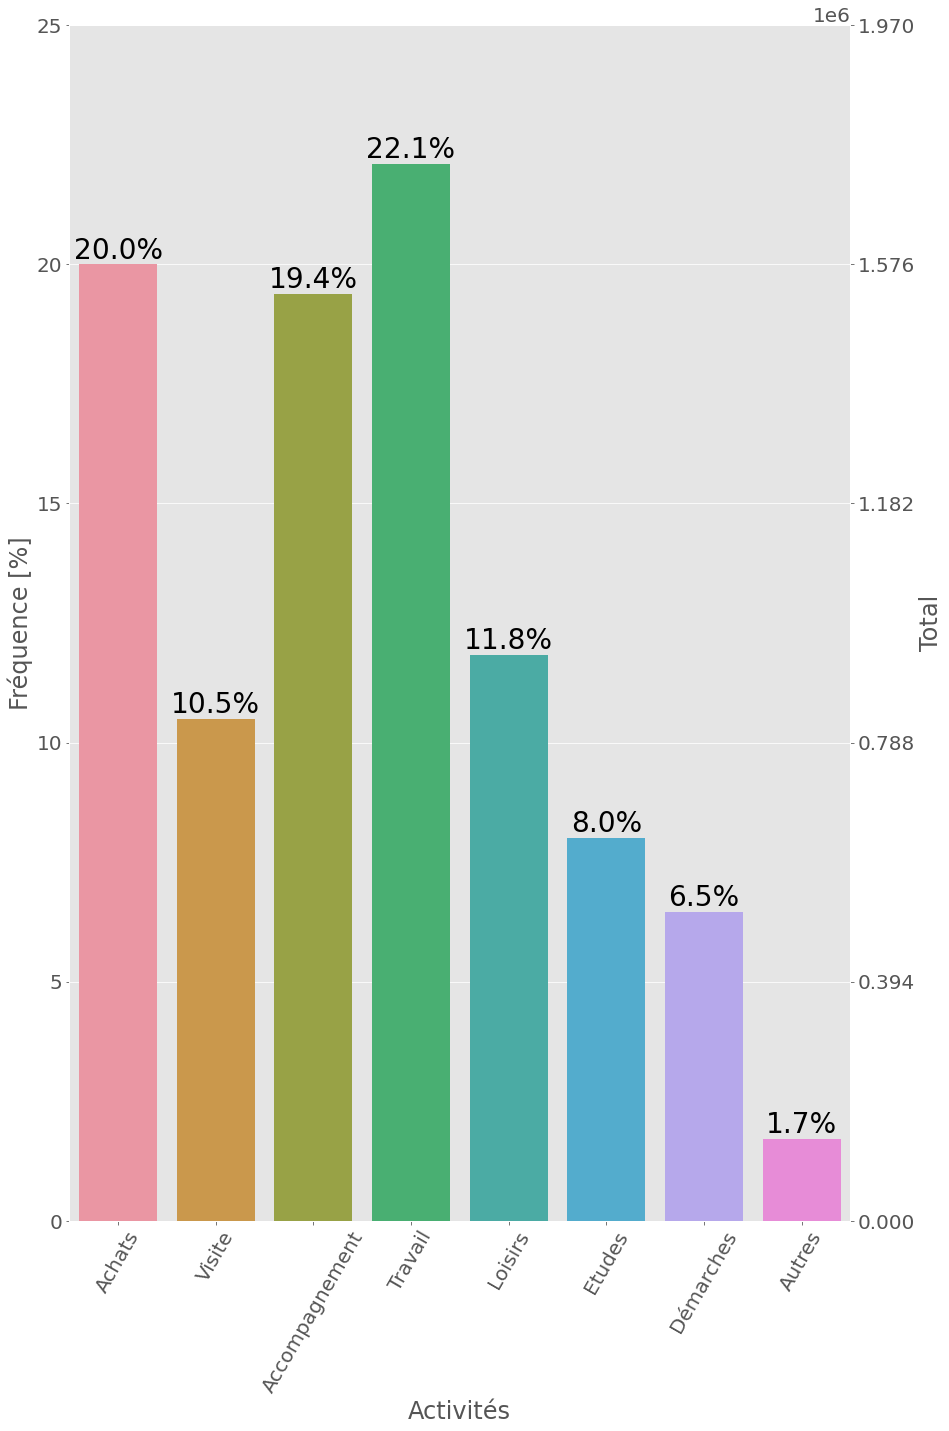

In [226]:
df_trips_recovery3 = df_trips_recovery1[df_trips_recovery1["DESTINATION_PURPOSE"]!="Domicile"]
ncount = len(df_trips_recovery3)

plt.figure(figsize=(14,22))
ax=sns.countplot(x='DESTINATION_PURPOSE', data=df_trips_recovery3)

#plt.title('Distribution of the population in activities')
plt.xlabel('Activités')
plt.xticks(rotation=60) # rotation label

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom',fontsize=28) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(6))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/25))
ax.set_ylim(0,ncount/(100/25))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#change_width(ax, .35)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/activitiesDistribution2.pdf')

In [227]:
# For simulation
df_trips_recovery2=df_trips_recovery.copy()
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 1.0] = "Domicile"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 2.0] = "Travail"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 3.0] = "Etudes"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 6.0] = "Achats"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 7.0] = "Loisirs"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 8.0] = "Loisirs"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 9.0] = "Loisirs"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 10.0] = "Loisirs"
df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 11.0] = "Loisirs"

<ipython-input-227-3f8a45de25f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trips_recovery2["DESTINATION_PURPOSE"][df_trips_recovery2["DESTINATION_PURPOSE"] == 1.0] = "Domicile"


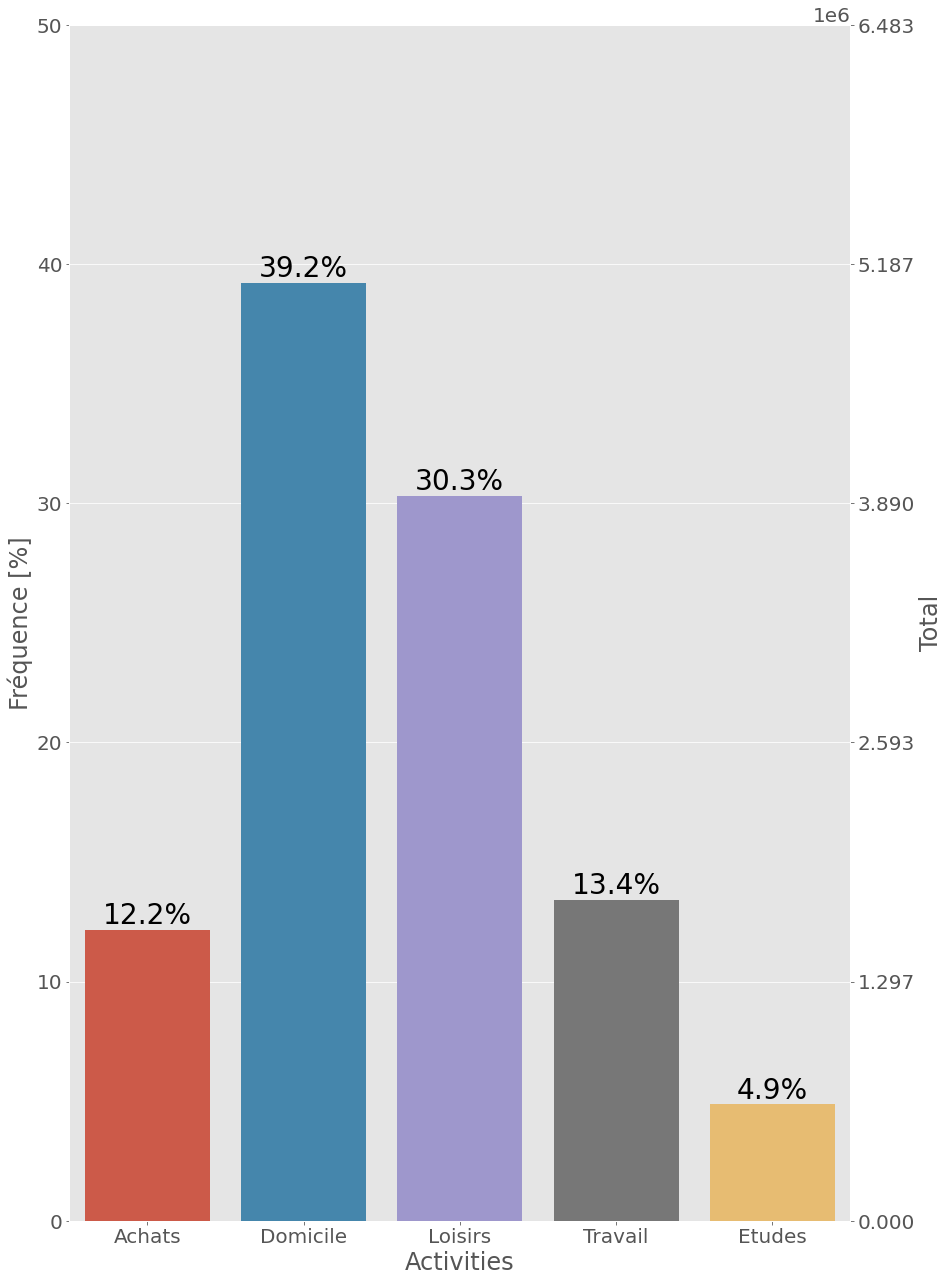

In [232]:
ncount = len(df_trips_recovery2)

plt.figure(figsize=(14,22))
ax=sns.countplot(x='DESTINATION_PURPOSE', data=df_trips_recovery2)

#plt.title('Distribution of the population in activities')
plt.xlabel('Activities')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom',fontsize=28) # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(6))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/50))
ax.set_ylim(0,ncount/(100/50))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

#change_width(ax, .35)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/activitiesDistribution.pdf')

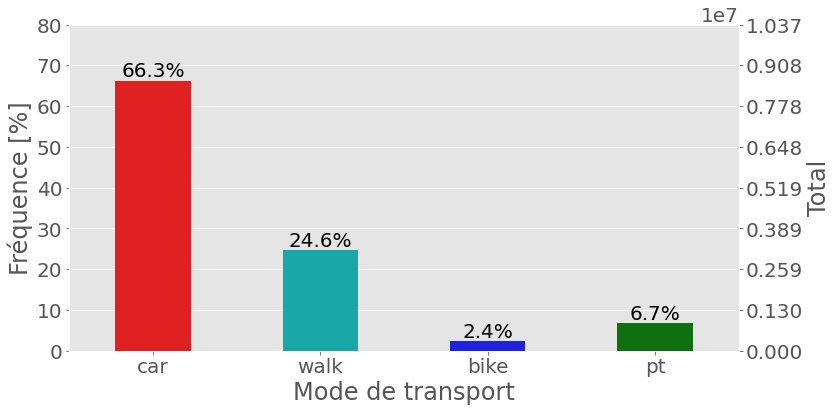

In [214]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(12,6))
ax=sns.countplot(x='mode', data=df_trips_recovery, palette={"car": "r", "pt": "g", "bike":"b", "walk":"c"})

#plt.title(' Distribution des modes de transport principal pour 100% des trajets')
plt.xlabel('Mode de transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(9))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/(100/80))
ax.set_ylim(0,ncount/(100/80))

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .45)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/modeShare.pdf')

In [236]:
car = df_trips_recovery[df_trips_recovery["mode"]=="car"]
bike = df_trips_recovery[df_trips_recovery["mode"]=="bike"]
pt = df_trips_recovery[df_trips_recovery["mode"]=="pt"]
walk = df_trips_recovery[df_trips_recovery["mode"]=="walk"]

In [237]:
print("car  =",len(car))
print("bike =",len(bike))
print("pt   =",len(pt))
print("walk =",len(walk))

car  = 8596567
bike = 307993
pt   = 868361
walk = 3193573


In [238]:
print("car  =",100*len(car)/len(df_trips_recovery))
print("bike =",100*len(bike)/len(df_trips_recovery))
print("pt   =",100*len(pt)/len(df_trips_recovery))
print("walk =",100*len(walk)/len(df_trips_recovery))

car  = 66.29831471791834
bike = 2.375298982130405
pt   = 6.69696064333196
walk = 24.629425656619283


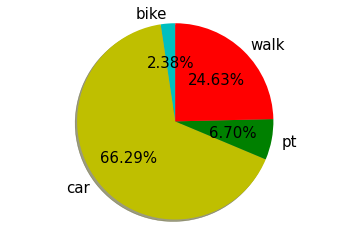

In [303]:
# Ref 1 : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pie.html
# Ref 2 : https://indianaiproduction.com/matplotlib-pie-chart/
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'bike', 'car', 'pt','walk'
sizes = [2.38, 66.3, 6.7, 24.63]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
myColor = ['c', 'y', 'g', 'r'] # specify colors
sizeText = {"fontsize":15} # text size
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=myColor,textprops = sizeText ,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/modeshare100pct.pdf')

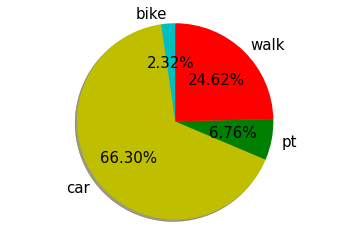

In [309]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'bike', 'car', 'pt','walk'
sizes = [2.31, 66.03, 6.73, 24.52]
explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
myColor = ['c', 'y', 'g', 'r'] # specify colors
sizeText = {"fontsize":15} # text size
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=myColor,textprops = sizeText ,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/modeshare10pct.pdf')

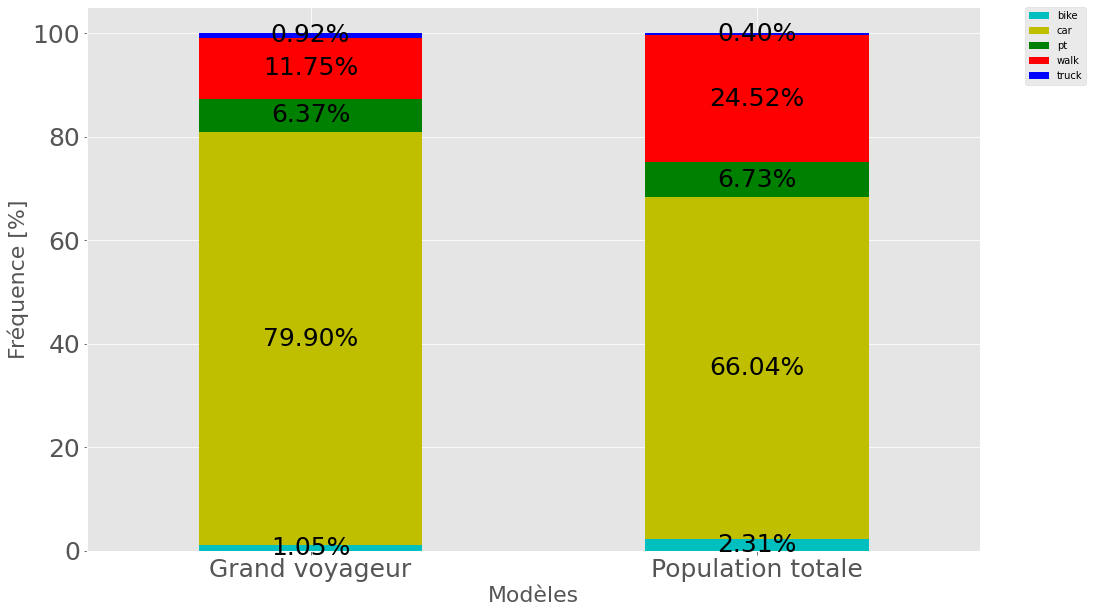

In [297]:
#modes = ["bike", "car", "pt", "walk", "truck"]
#modele_A1 = [100*5919/558915, 100*450731/558915, 100*35959/558915, 100*66306/558915, 100*0/558915]
#modele_A4 = [100*30284/1308198, 100*863871/1308198, 100*88038/1308198, 100*320829/1308198, 100*5176/1308198]

years=["Grand voyageur","Population totale"]
#years=["Nord","Pas-de-Calais","Aisne","Oise","Somme"]
data={
    "bike":[100*5919/(558915+5176),100*30284/1308198],
    "car":[100*450731/(558915+5176),100*863871/1308198],
    "pt":[100*35959/(558915+5176),100*88038/1308198],
    "walk":[100*66306/(558915+5176),100*320829/1308198],
    "truck":[100*5176/(558915+5176),100*5176/1308198],
    }
df=pd.DataFrame(data,index=years)

plt.style.use('ggplot')
Couleur=['c', 'y', 'g', 'r','b']
sizeText = {"fontsize":15} # text size
ax = df.plot(stacked=True, kind='bar', figsize=(16, 10),color=Couleur, rot='horizontal',fontsize=25)

# mettre les informations sur chaque barre
for rect in ax.patches:
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # remplir les valeurs à l'interieur des barres
    label_text = f'{h:.2f}''%'  
    # ax.text(x, y, text)
    label_x = x + w / 2
    label_y = y + h / 2

    # Test non non obligatoire pour ce cas
    #if height > 0:
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=25)

    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Fréquence [%]", fontsize=22)
ax.set_xlabel("Modèles", fontsize=22)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/ComparaisonModesA1vsA42.pdf')

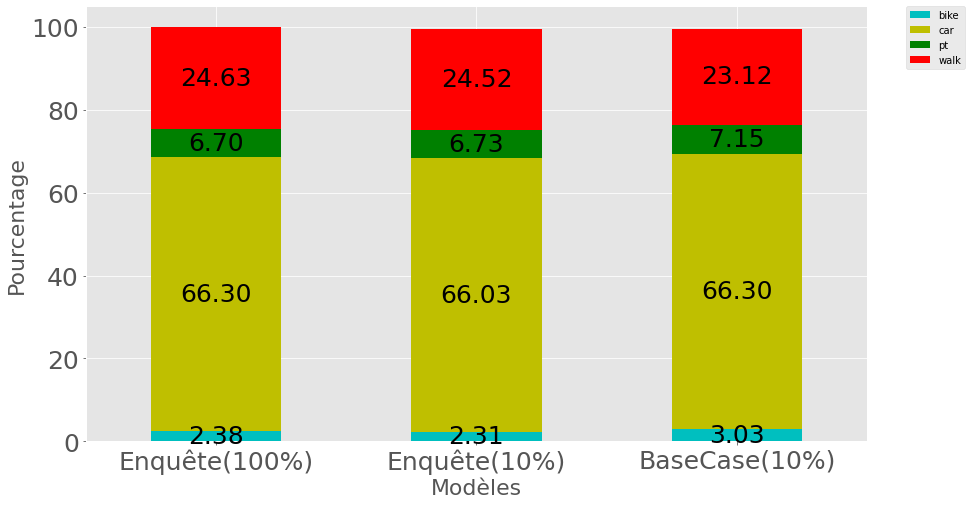

In [311]:
years=["Enquête(100%)","Enquête(10%)","BaseCase(10%)"]
#years=["Nord","Pas-de-Calais","Aisne","Oise","Somme"]
data={
    "bike":[2.38,2.31,3.03],
    "car":[66.3,66.03,66.3],
    "pt":[6.7,6.73,7.15],
    "walk":[24.63,24.52,23.12],
    }
df=pd.DataFrame(data,index=years)

plt.style.use('ggplot')
Couleur=['c', 'y', 'g', 'r']
ax = df.plot(stacked=True, kind='bar', figsize=(14, 8),color=Couleur, rot='horizontal', fontsize=25)

# mettre les informations sur chaque barre
for rect in ax.patches:
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # remplir les valeurs à l'interieur des barres
    label_text = f'{h:.2f}'  
    
    # ax.text(x, y, text)
    label_x = x + w / 2
    label_y = y + h / 2

    # Test non non obligatoire pour ce cas
    #if height > 0:
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=25)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Pourcentage", fontsize=22)
ax.set_xlabel("Modèles", fontsize=22)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/ComparaisonModesBase.pdf')

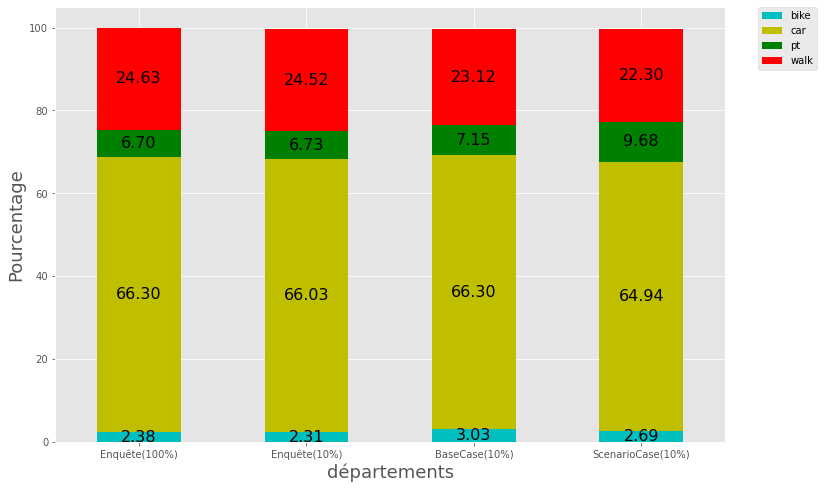

In [298]:
years=["Enquête(100%)","Enquête(10%)","BaseCase(10%)","ScenarioCase(10%)"]
#years=["Nord","Pas-de-Calais","Aisne","Oise","Somme"]
data={
    "bike":[2.38,2.31,3.03,2.69],
    "car":[66.3,66.03,66.3,64.94],
    "pt":[6.7,6.73,7.15,9.68],
    "walk":[24.63,24.52,23.12,22.3],
    }
df=pd.DataFrame(data,index=years)

plt.style.use('ggplot')
Couleur=['c', 'y', 'g', 'r']
ax = df.plot(stacked=True, kind='bar', figsize=(12, 8),color=Couleur, rot='horizontal')

# mettre les informations sur chaque barre
for rect in ax.patches:
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # remplir les valeurs à l'interieur des barres
    label_text = f'{h:.2f}'  
    
    # ax.text(x, y, text)
    label_x = x + w / 2
    label_y = y + h / 2

    # Test non non obligatoire pour ce cas
    #if height > 0:
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=16)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Pourcentage", fontsize=18)
ax.set_xlabel("Modèles", fontsize=18)
#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/ComparaisonModesfreePT.pdf')

# Study trip MEL

In [10]:
T1 = pd.read_csv('output_hdf/travelDiaries/travelDiary_mel.txt',sep=";",encoding='utf8') 

/home/ndiop/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
# careful : df_trips0 now for MEL not NPDC like before
df_trips0 = T1[["DECH","PECH","D2AA","D5AA","P2","P4","MODP","COEQ"]]
df_trips0=df_trips0.rename(columns={"P4":"AGE","P2":"SEXE","D2AA":"ORIGIN_PURPOSE",
                                    "D5AA":"DESTINATION_PURPOSE","MODP":"num_mode"})
# Récupération de la liste des codes modes
liste = list(df_trips0["num_mode"].drop_duplicates(keep='first'))

dfCorr = CorrespondanceCreation(liste) # ModeTransport_NPDC() and CorrespondanceCreation() already runned

df_trips = mapping(df_trips0.copy(), dfCorr) # mapping() already runned

In [31]:
df_trips.COEQ.sum()

4336498.64292754

In [39]:
tripFull = pd.concat([df_trips,tripFRONT5], axis=0, ignore_index=True)

In [40]:
tripFull

,DECH,PECH,ORIGIN_PURPOSE,DESTINATION_PURPOSE,SEXE,AGE,num_mode,COEQ,mode
0,120040001010600201,1200400010106002,1,2,1,48,21,49.580212,car
1,120040001010600202,1200400010106002,2,1,1,48,21,49.580212,car
2,120040001022050203,1200400010220502,1,9,1,19,21,47.742799,car
3,120040001040820101,1200400010408201,1,2,1,58,21,97.733724,car
4,120040001040820102,1200400010408201,2,1,1,58,21,97.733724,car
...,...,...,...,...,...,...,...,...,...
76808,26413,3684730_b,2,1,2,25,4,1.140069,car
76809,26414,3718593_b,1,2,1,40,4,3.133791,car
76810,26415,3718593_b,2,1,1,40,4,3.133791,car
76811,26416,3719709_b,1,2,1,50,4,4.543949,car


In [42]:
df_trips_recovery = recovery(tripFull.copy(), "DECH", "COEQ", "rec_trip_id", 1234)
df_trips_recovery.reset_index(drop=True)

<ipython-input-41-e1c84b6db7b7>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_rounding["multiplicator"] = df_rounding["multiplicator"].astype(np.int)


,DECH,PECH,ORIGIN_PURPOSE,DESTINATION_PURPOSE,SEXE,AGE,num_mode,mode,rec_trip_id
0,0,1200400010106002,1,2,1,48,21,car,120040001010600201
1,1,1200400010106002,1,2,1,48,21,car,120040001010600201
2,2,1200400010106002,1,2,1,48,21,car,120040001010600201
3,3,1200400010106002,1,2,1,48,21,car,120040001010600201
4,4,1200400010106002,1,2,1,48,21,car,120040001010600201
...,...,...,...,...,...,...,...,...,...
4390503,4390503,3719709_b,1,2,1,50,4,car,26416
4390504,4390504,3719709_b,2,1,1,50,4,car,26417
4390505,4390505,3719709_b,2,1,1,50,4,car,26417
4390506,4390506,3719709_b,2,1,1,50,4,car,26417


In [43]:
len(df_trips_recovery)

4390508

In [44]:
df_trips_recovery.to_csv ("output_hdf/mobility/df_trips_full_MEL_recovery.txt", index=None, sep=";") 

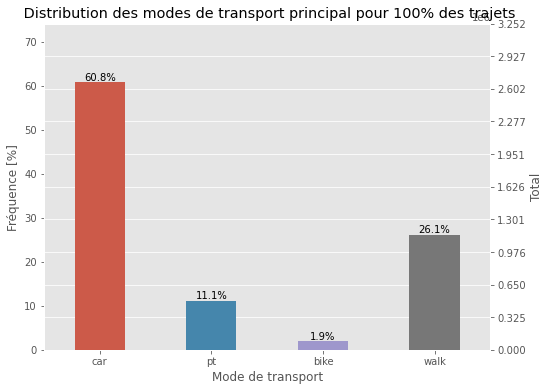

In [45]:
ncount = len(df_trips_recovery)

plt.figure(figsize=(8,6))
ax=sns.countplot(x='mode', data=df_trips_recovery)

plt.title(' Distribution des modes de transport principal pour 100% des trajets')
plt.xlabel('Mode de transport')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Total')
ax2.set_ylabel('Fréquence [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100/1.35)
ax.set_ylim(0,ncount/1.35)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

change_width(ax, .45)
plt.show()
#plt.savefig('modeshare.pdf')

In [46]:
car = df_trips_recovery[df_trips_recovery["mode"]=="car"]
bike = df_trips_recovery[df_trips_recovery["mode"]=="bike"]
pt = df_trips_recovery[df_trips_recovery["mode"]=="pt"]
walk = df_trips_recovery[df_trips_recovery["mode"]=="walk"]

In [47]:
print("car  =",len(car))
print("bike =",len(bike))
print("pt   =",len(pt))
print("walk =",len(walk))

car  = 2670316
bike = 84658
pt   = 488115
walk = 1147419


In [48]:
print("car  =",100*len(car)/len(df_trips_recovery))
print("bike =",100*len(bike)/len(df_trips_recovery))
print("pt   =",100*len(pt)/len(df_trips_recovery))
print("walk =",100*len(walk)/len(df_trips_recovery))

car  = 60.82020577117728
bike = 1.928205118860961
pt   = 11.11750622023693
walk = 26.134082889724834


In [50]:
# recherche agent vers le centre-ville de lille
T1

,DECH,PECH,COEQ,DP2,D4A,D4B,D3,D3X,D3Y,D2AA,...,D215,D315,D415,D615,D715,D815,D915,ECH_x,NUM_D30_D3,NUM_D30_D7
0,120040001010600201,1200400010106002,49.580212,62119,7,30,62119,674661.80202,7.048040e+06,1,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000101060,24.0,12.0
1,120040001010600202,1200400010106002,49.580212,62119,17,45,59350,703330.96289,7.059423e+06,2,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000101060,12.0,24.0
2,120040001022050203,1200400010220502,47.742799,62119,18,0,62119,674661.80202,7.048040e+06,1,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000102205,24.0,12.0
3,120040001040820101,1200400010408201,97.733724,62119,7,30,62119,674661.80202,7.048040e+06,1,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000104082,24.0,12.0
4,120040001040820102,1200400010408201,97.733724,62119,18,20,59350,703330.96289,7.059423e+06,2,...,10837.000000,12729.62963,14623.0,19225.416667,21900.666667,25877.333333,33081.333333,12004000104082,12.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50390,30201445600319660102,302014456003196601,7.490811,80021,18,0,59009,710832.17995,7.059486e+06,2,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144560031966,12.0,32.0
50391,30201445600603430202,302014456006034302,8.910097,80021,9,20,80021,649001.84505,6.978182e+06,6,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144560060343,32.0,12.0
50392,30201445600603430203,302014456006034302,8.910097,80021,15,0,59350,703330.96289,7.059423e+06,7,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144560060343,12.0,12.0
50393,30201445600603430204,302014456006034302,8.910097,80021,16,30,59350,703330.96289,7.059423e+06,8,...,11167.560976,13250.50000,15356.8,20084.000000,22956.000000,27043.333333,34545.000000,3020144560060343,12.0,12.0


In [ ]:
years=["Enquête(100%)","Enquête(10%)","BaseCase(10%)","ScenarioCase(10%)"]
#years=["Nord","Pas-de-Calais","Aisne","Oise","Somme"]
data={
    "bike":[2.38,2.31,3.03,2.69],
    "car":[66.3,66.03,66.3,64.94],
    "pt":[6.7,6.73,7.15,9.68],
    "walk":[24.63,24.52,23.12,22.3],
    }
df=pd.DataFrame(data,index=years)

plt.style.use('ggplot')
Couleur=['b', 'y', 'g', 'r']
ax = df.plot(stacked=True, kind='bar', figsize=(12, 8),color=Couleur, rot='horizontal')

# mettre les informations sur chaque barre
for rect in ax.patches:
    h = rect.get_height()
    w = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # remplir les valeurs à l'interieur des barres
    label_text = f'{h:.2f}'  
    
    # ax.text(x, y, text)
    label_x = x + w / 2
    label_y = y + h / 2

    # Test non non obligatoire pour ce cas
    #if height > 0:
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=16)
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
ax.set_ylabel("Pourcentage", fontsize=18)
ax.set_xlabel("départements", fontsize=18)
plt.show()

# Info activities and incomes

In [25]:
I = pd.read_csv('output_hdf/mobility/infotrips100pct.csv',sep=";",encoding='utf8') 

In [26]:
df_home=I[I["activity"]=="home"]

In [27]:
Inc=df_home.copy().drop_duplicates(subset=["id"], keep='first') 
# to study distribution of incomes and distance between stops and home

In [28]:
# list of persons with their incomes and home
Inc=Inc[["id","income","X","Y"]]

In [29]:
Inc

,id,income,X,Y
0,01200400010100402_0001,12850.7<,674917.40724,7.047999e+06
6,01200400010100402_0002,12850.7<,674545.30403,7.048060e+06
12,01200400010100402_0003,12850.7<,674545.21748,7.047607e+06
18,01200400010100402_0004,12850.7<,674253.76674,7.048194e+06
24,01200400010100402_0005,12850.7<,674897.88386,7.047869e+06
...,...,...,...,...
15929975,302014456009094701_0005,35425.4<,648758.56655,6.978404e+06
15929978,302014456009094701_0006,35425.4<,649108.28941,6.978196e+06
15929981,302014456009094701_0007,35425.4<,648643.37604,6.978396e+06
15929984,302014456009094701_0008,35425.4<,649358.40695,6.977920e+06


In [30]:
Inc1 = Inc.copy()['income'].str.split('<').str[0]
Inc1 = Inc1.to_frame()
Inc1 = Inc1.rename(columns = {'income':'revenu'})
Inc2 = pd.concat([Inc.copy(),Inc1.copy()], axis=1, ignore_index=False)

In [142]:
Inc2.to_csv("output_hdf/mobility/incomeperPerson.csv", sep=";", encoding="utf8", index=False)

In [31]:
Inc2

,id,income,X,Y,revenu
0,01200400010100402_0001,12850.7<,674917.40724,7.047999e+06,12850.7
6,01200400010100402_0002,12850.7<,674545.30403,7.048060e+06,12850.7
12,01200400010100402_0003,12850.7<,674545.21748,7.047607e+06,12850.7
18,01200400010100402_0004,12850.7<,674253.76674,7.048194e+06,12850.7
24,01200400010100402_0005,12850.7<,674897.88386,7.047869e+06,12850.7
...,...,...,...,...,...
15929975,302014456009094701_0005,35425.4<,648758.56655,6.978404e+06,35425.4
15929978,302014456009094701_0006,35425.4<,649108.28941,6.978196e+06,35425.4
15929981,302014456009094701_0007,35425.4<,648643.37604,6.978396e+06,35425.4
15929984,302014456009094701_0008,35425.4<,649358.40695,6.977920e+06,35425.4


In [32]:
Inc3 = Inc2.copy()['id'].str.split('_').str[0]

In [33]:
Inc3 = Inc3.to_frame()
Inc3 = Inc3.rename(columns = {'id':'person'})
Inc4 = pd.concat([Inc2.copy(),Inc3.copy()], axis=1, ignore_index=False)

In [34]:
Inc4

,id,income,X,Y,revenu,person
0,01200400010100402_0001,12850.7<,674917.40724,7.047999e+06,12850.7,01200400010100402
6,01200400010100402_0002,12850.7<,674545.30403,7.048060e+06,12850.7,01200400010100402
12,01200400010100402_0003,12850.7<,674545.21748,7.047607e+06,12850.7,01200400010100402
18,01200400010100402_0004,12850.7<,674253.76674,7.048194e+06,12850.7,01200400010100402
24,01200400010100402_0005,12850.7<,674897.88386,7.047869e+06,12850.7,01200400010100402
...,...,...,...,...,...,...
15929975,302014456009094701_0005,35425.4<,648758.56655,6.978404e+06,35425.4,302014456009094701
15929978,302014456009094701_0006,35425.4<,649108.28941,6.978196e+06,35425.4,302014456009094701
15929981,302014456009094701_0007,35425.4<,648643.37604,6.978396e+06,35425.4,302014456009094701
15929984,302014456009094701_0008,35425.4<,649358.40695,6.977920e+06,35425.4,302014456009094701


In [43]:
df_persons = pd.read_csv('input_hdf/person_hdf.csv',sep=";",encoding='utf8',dtype="str") 

In [44]:
pers=df_persons[["PECH","PP2"]]

In [45]:
def mapping(data, target):
    #select columns
    target.columns =["PECH","PP2"]
# mapping

    # mapping code INSEE et coordonnées (nécessaire pour la localisation des activités : pour les variables D3 et D7)
    map_x = dict(zip(target.PECH, target.PP2))

# création de colonnes
    # Créer des colonnes pour Superficie
    data["INSEE_COM"]=data["person"]

# remplacement

 # remplacer les codes INSEE par les superficies
    data[["INSEE_COM"]] = data[["INSEE_COM"]].applymap(map_x.get)


    # suppression des données dont les coordonnées X,Y ne figurent pas dans la base ComunesXY.csv ==> menage_xy
    data = data.dropna(subset=["INSEE_COM"])

    return data

Inc5 = mapping(Inc4.copy(), pers)

In [46]:
Inc5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2902505 entries, 0 to 15929987
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         object 
 1   income     object 
 2   X          float64
 3   Y          float64
 4   revenu     object 
 5   person     object 
 6   INSEE_COM  object 
dtypes: float64(2), object(5)
memory usage: 177.2+ MB


In [47]:
Inc5['revenu'] = Inc5['revenu'].astype(float, errors = 'raise')

In [48]:
# for Qgis 

In [49]:
IncMoyCOM = Inc5.copy().groupby(['INSEE_COM']).mean().reset_index()

In [50]:
IncMoyCOM

,INSEE_COM,X,Y,revenu
0,02014,721845.739921,6.945716e+06,14000.5
1,02018,731375.518896,6.933864e+06,15704.5
2,02020,788107.849294,6.976381e+06,18380.6
3,02040,761518.191036,6.977898e+06,14991.6
4,02050,753746.142133,6.993704e+06,14991.6
...,...,...,...,...
1699,80810,632622.703400,7.016959e+06,22393.3
1700,80811,698830.956596,6.963298e+06,22280.2
1701,80815,611884.970384,7.024966e+06,22393.3
1702,80820,666304.650946,6.991084e+06,21722.8


In [156]:
IncMoyCOM.to_csv("output_hdf/mobility/IncomeMoyCOM.csv", sep=";", encoding="utf8", index=False) 
# for QGIS distribution per Commune

In [51]:
# Distrobution per commune and 10 class
df=IncMoyCOM.copy()
conditions = [
    (df['revenu'] < 15000),
    (df['revenu'] >= 15000) & (df['revenu'] < 20000),
    (df['revenu'] >= 20000) & (df['revenu'] < 25000),
    (df['revenu'] >= 25000) & (df['revenu'] < 30000),
    (df['revenu'] >= 30000) & (df['revenu'] < 35000),
    (df['revenu'] >= 35000) & (df['revenu'] < 40000),
    (df['revenu'] >= 40000)
]
values = ['< 15k', '< 20k', '< 25k','< 30k', '< 35k', '< 40k','> 40k']
df['Income_Group'] = np.select(conditions, values)

In [52]:
df2 = df.copy().groupby(['Income_Group']).count().reset_index()

In [53]:
df2

,Income_Group,INSEE_COM,X,Y,revenu
0,< 15k,416,416,416,416
1,< 20k,625,625,625,625
2,< 25k,434,434,434,434
3,< 30k,181,181,181,181
4,< 35k,24,24,24,24
5,< 40k,21,21,21,21
6,> 40k,3,3,3,3


In [54]:
df["revenu"].mean()

18859.564910214624

In [55]:
df["revenu"].median()

18523.55846638178

In [56]:
# Distribution per person and three class
Inc5

,id,income,X,Y,revenu,person,INSEE_COM
0,01200400010100402_0001,12850.7<,674917.40724,7.047999e+06,12850.7,01200400010100402,62119
6,01200400010100402_0002,12850.7<,674545.30403,7.048060e+06,12850.7,01200400010100402,62119
12,01200400010100402_0003,12850.7<,674545.21748,7.047607e+06,12850.7,01200400010100402,62119
18,01200400010100402_0004,12850.7<,674253.76674,7.048194e+06,12850.7,01200400010100402,62119
24,01200400010100402_0005,12850.7<,674897.88386,7.047869e+06,12850.7,01200400010100402,62119
...,...,...,...,...,...,...,...
15929975,302014456009094701_0005,35425.4<,648758.56655,6.978404e+06,35425.4,302014456009094701,80021
15929978,302014456009094701_0006,35425.4<,649108.28941,6.978196e+06,35425.4,302014456009094701,80021
15929981,302014456009094701_0007,35425.4<,648643.37604,6.978396e+06,35425.4,302014456009094701,80021
15929984,302014456009094701_0008,35425.4<,649358.40695,6.977920e+06,35425.4,302014456009094701,80021


In [57]:
df=Inc5.copy()
conditions = [
    (df['revenu'] < 11324.39),
    (df['revenu'] >= 11324.39) & (df['revenu'] < 22995.59),
    (df['revenu'] >= 22995.59)
]
values = ['low', 'medium', 'high']
df['Income_Group'] = np.select(conditions, values)


#  rev_th1 = 11324.39; # threshold between rev1 and rev2
#  rev_th2 = 22995.59; # threshold between rev2 and rev3 

In [58]:
df

,id,income,X,Y,revenu,person,INSEE_COM,Income_Group
0,01200400010100402_0001,12850.7<,674917.40724,7.047999e+06,12850.7,01200400010100402,62119,medium
6,01200400010100402_0002,12850.7<,674545.30403,7.048060e+06,12850.7,01200400010100402,62119,medium
12,01200400010100402_0003,12850.7<,674545.21748,7.047607e+06,12850.7,01200400010100402,62119,medium
18,01200400010100402_0004,12850.7<,674253.76674,7.048194e+06,12850.7,01200400010100402,62119,medium
24,01200400010100402_0005,12850.7<,674897.88386,7.047869e+06,12850.7,01200400010100402,62119,medium
...,...,...,...,...,...,...,...,...
15929975,302014456009094701_0005,35425.4<,648758.56655,6.978404e+06,35425.4,302014456009094701,80021,high
15929978,302014456009094701_0006,35425.4<,649108.28941,6.978196e+06,35425.4,302014456009094701,80021,high
15929981,302014456009094701_0007,35425.4<,648643.37604,6.978396e+06,35425.4,302014456009094701,80021,high
15929984,302014456009094701_0008,35425.4<,649358.40695,6.977920e+06,35425.4,302014456009094701,80021,high


In [267]:
df3 = df.copy().groupby(['Income_Group']).count().reset_index()

In [268]:
df3

,Income_Group,id,income,X,Y,revenu,person,INSEE_COM
0,high,861176,861176,861176,861176,861176,861176,861176
1,low,492028,492028,492028,492028,492028,492028,492028
2,medium,1549301,1549301,1549301,1549301,1549301,1549301,1549301


In [274]:
861176+492028+1549301

2902505

In [282]:
1549301/2902505

0.5337806480953521

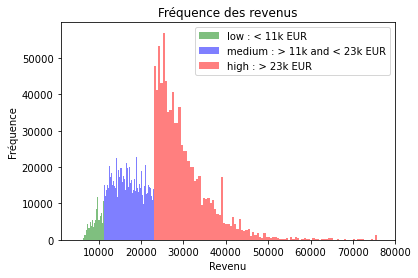

In [59]:
x1 = df.loc[df.Income_Group=='low', 'revenu']
x2 = df.loc[df.Income_Group=='medium', 'revenu']
x3 = df.loc[df.Income_Group=='high', 'revenu']

kwargs = dict(alpha=0.5, bins=100)

plt.hist(x1, **kwargs, color='g', label='low : < 11k EUR')
plt.hist(x2, **kwargs, color='b', label='medium : > 11k and < 23k EUR')
plt.hist(x3, **kwargs, color='r', label='high : > 23k EUR')
plt.gca().set(title='Fréquence des revenus', ylabel='Fréquence', xlabel='Revenu')
plt.xlim(1000,80000)
plt.legend();
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/incomePers2.pdf')

In [178]:
len(df[df["Income_Group"]=="low"])

492028

In [179]:
len(df[df["Income_Group"]=="medium"])

1549301

In [180]:
len(df[df["Income_Group"]=="high"])

861176

In [181]:
len(df)

2902505

In [183]:
1549301/2902505

0.5337806480953521

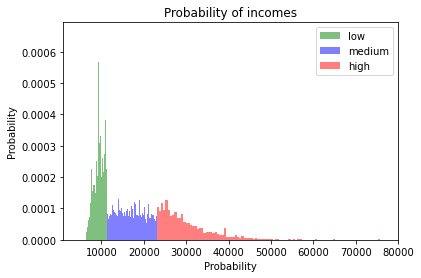

In [60]:
# Normalize
kwargs = dict(alpha=0.5, bins=100, density=True, stacked=True)

# Plot
plt.hist(x1, **kwargs, color='g', label='low')
plt.hist(x2, **kwargs, color='b', label='medium')
plt.hist(x3, **kwargs, color='r', label='high')
plt.gca().set(title='Probability of incomes', ylabel='Probability', xlabel='Probability')
plt.xlim(1000,80000)
plt.legend();

In [2]:
# Plot
fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['tab:red', 'tab:blue', 'tab:green']

for i, (ax, Income_Group) in enumerate(zip(axes.flatten(), df.Income_Group.unique())):
    x = df.loc[df.Income_Group==Income_Group, 'revenu']
    ax.hist(x, alpha=0.5, bins=100, density=True, stacked=True, label=str(Income_Group), color=colors[i])
    ax.set_title(Income_Group)

plt.suptitle('Probability Histogram of Diamond Depths', y=1.05, size=16)
#ax.set_xlim(0, 20000); ax.set_ylim(0, 1);
plt.tight_layout();

NameError: name 'plt' is not defined

In [239]:
#C = T1[T1["modes"]=="car"]
#B = T1[T1["modes"]=="bike"]
#W = T1[T1["modes"]=="walk"]
#T = T1[T1["modes"]=="truck"]
#P = T1[(T1["modes"]!="car") | (T1["modes"]!="bike") | (T1["modes"]!="walk") | T1["modes"]!="truck")]

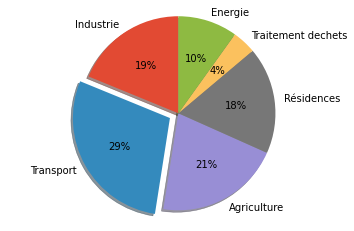

In [303]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Industrie', 'Transport',  'Agriculture','Résidences', 'Traitement dechets','Energie'
sizes = [19, 29,  21, 18, 4, 10]
explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/gescitepa.pdf')

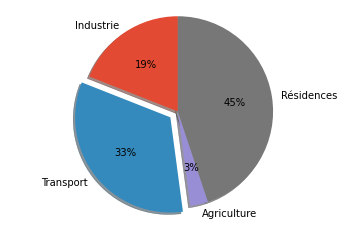

In [291]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Industrie', 'Transport', 'Agriculture','Résidences'
sizes = [28.4, 49.4, 4.5, 67.0]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/nrjcons.pdf')

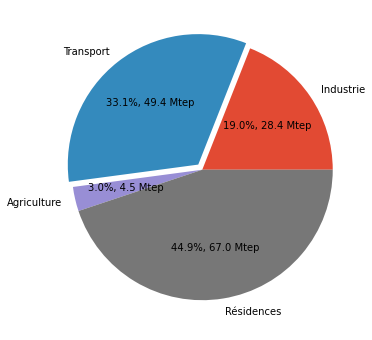

In [301]:
# 2015
plt.figure(figsize=(8,6))
values = [28.4, 49.4, 4.5, 67.0] 
labels = ['Industrie', 'Transport', 'Agriculture','Résidences'] 
explode = (0, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(values, explode=explode, labels=labels, autopct=lambda p:f'{p:.1f}%, {p*sum(values)/100 :.1f} Mtep')
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/nrjcons2015.pdf')

In [308]:
tep2019=142
res=0.46*tep2019
ind=0.19*tep2019
tran=0.32*tep2019
agr=0.03*tep2019

In [309]:
res

65.32000000000001

In [310]:
ind

26.98

In [311]:
tran

45.44

In [312]:
agr

4.26

In [313]:
res+ind+tran+agr

142.0

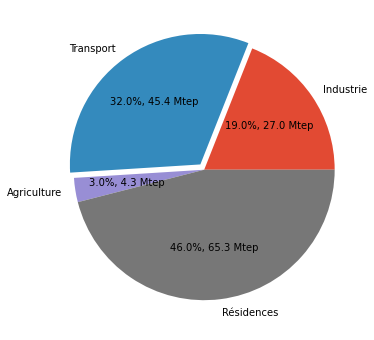

In [314]:
# 2019
plt.figure(figsize=(8,6))
values = [26.98, 45.44, 4.26, 65.32] 
labels = ['Industrie', 'Transport', 'Agriculture','Résidences'] 
explode = (0, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(values, explode=explode, labels=labels, autopct=lambda p:f'{p:.1f}%, {p*sum(values)/100 :.1f} Mtep')
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/nrjcons2019.pdf')

In [320]:
conv=11.63

In [321]:
res=(487+269)/conv
ind=302/conv
tran=443/conv
agr=51/conv

In [322]:
print(res,ind,tran,agr)

65.0042992261393 25.967325881341356 38.09114359415305 4.3852106620808255


In [323]:
res+ind+tran+agr

133.44797936371452

In [329]:
(142-134)/142

0.056338028169014086

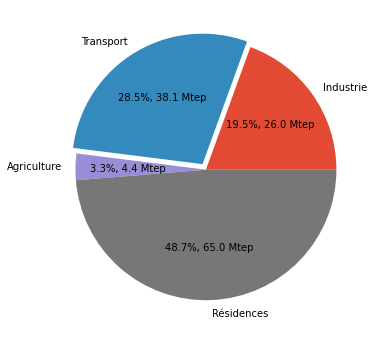

In [401]:
# 2020
plt.figure(figsize=(8,6))
values = [25.97, 38.09, 4.38, 65.00] 
labels = ['Industrie', 'Transport', 'Agriculture','Résidences'] 
explode = (0, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(values, explode=explode, labels=labels, autopct=lambda p:f'{p:.1f}%, {p*sum(values)/100 :.1f} Mtep')
plt.savefig('/home/ndiop/Documents/phd/manuscrit/images/nrjcons2020.pdf')

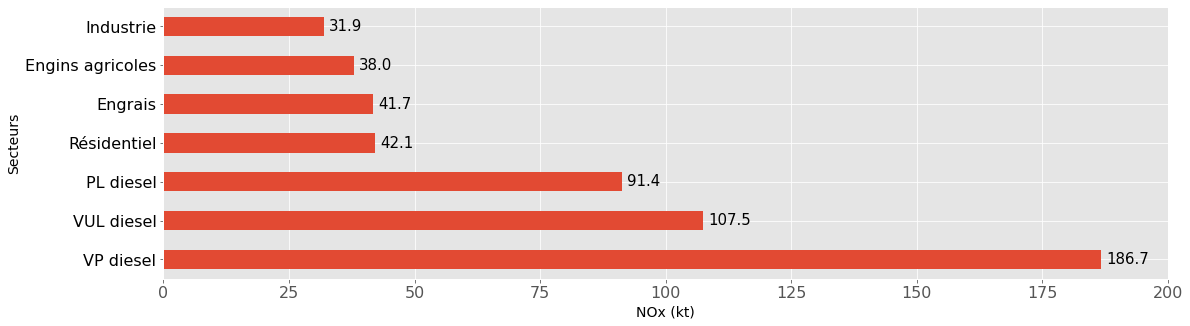

In [393]:
# https://qastack.fr/programming/28931224/adding-value-labels-on-a-matplotlib-bar-chart
# Bring some raw data.
frequencies = [186.7, 107.5, 91.4, 42.1, 41.7, 38.0, 31.9]

freq_series = pd.Series(frequencies)

y_labels = ['VP diesel', 'VUL diesel', 'PL diesel', 'Résidentiel', 'Engrais', 'Engins agricoles', 'Industrie']


# Plot the figure.
plt.figure(figsize=(18, 5))
ax = freq_series.plot(kind='barh', fontsize=16)
#ax.set_title('Emission de NOx en 2019')
ax.set_xlabel('NOx (kt)', fontsize=14, color='black') # , fontweight='bold'
ax.set_ylabel('Secteurs', fontsize=14, color='black')
ax.set_yticklabels(y_labels, fontsize=16, color='black')
ax.set_xlim(0, 200) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for
        fontsize=15)                # size values.

plt.savefig("/home/ndiop/Documents/phd/manuscrit/images/nox2019.pdf")

In [1]:
27439/300000

0.09146333333333333